# Title-Regression Analysis on CO2 Emission by Vehicle

### Table of content
     1.Introduction
     2.Exploratory Data Analysis
     3.Linear Regression Models
     4.Polynomial Regression Models
     5.Ridge Regression Models
     6.Lasso Regression Models
     7.ElasticNet
     8.Final Evaluation
     9.Performance of models by visualization
     10.Conclusion

# 1.Introduction

Regression analysis is a statistical technique for investigating and modeling the relationship between variables. Applications of regression are numerous and occuring almost every ﬁeld, including engineering, the physical and chemical sciences,economics, management, life and biological sciences, and the social sciences. In fact,regression analysis may be the most widely used statistical technique.

Linear models can be used for prediction or to evaluate whether there is a linear relationship between two numerical variables.

Linear regression assumes that the relationship between two variables, x and y, can be modeled by a straight line:

y = β0 + β1x

where β0 and β1 represent two model parameters (β is the Greek letter beta). (This use of β has nothing to do with the β we used to describe the probability of a Type II error.) These parameters are estimated using data, and we write their point estimates as b0 and b1. When we use x to predict y, we usually call x the explanatory or predictor variable, and we call y the response.

We perform the following regression model 
               
     1.Linear Regression
     2.Polynomial Regression
     3.Ridge regression
     4.Lasso regression
     5.ElasticNet

### 1.1 Dataset Information

I  took this dataset from kaggle.Varities of dataset are available on kaggle.As I am from Mechanical background I thought that lets do our first mini project on topic related to our field.For Machine Learning your background doesn't really matter.If you know the concept of Machine learning then u can implement it anywhere and in any department.

This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website. This is a compiled version. This contains data over a period of 7 years. There are total 7385 rows and 12 columns. There are few abbreviations that has been used to describe the features. I am listing them out here. 

### 1.2 Column Information

    Make= Company of the vehicle
    Model= Car model
    Vehicle Class= Class of vehicle depending on their utility, capacity and weight
    Engine Size = Size of engine used in Litre
    Cylinders= Number of cylinders
    Transmission = Transmission type with number of gears
    Fuel type =Type of Fuel used
    Fuel Consumption City=Fuel consumption in city roads (L/100 km)
    Fuel Consumption Hwy=Fuel consumption in Hwy roads (L/100 km)
    Fuel Consumption Comb=The combined fuel consumption (55% city, 45% highway) is shown in L/100 km
    Fuel Consumption Comb mpg =The combined fuel consumption in both city and highway is shown in mile per gallon(mpg)
    CO2 Emissions(g/km)=The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway                             driving

###### Model                                                                             
    4WD/4X4 = Four-wheel drive                 
    AWD = All-wheel drive
    FFV = Flexible-fuel vehicle
    SWB = Short wheelbase
    LWB = Long wheelbase
    EWB = Extended wheelbase
    
###### Transmission 
    A = Automatic
    AM = Automated manual
    AS = Automatic with select shift
    AV = Continuously variable
    M = Manual
    3 - 10 = Number of gears  
    
###### Fuel type 
    X = Regular gasoline
    Z = Premium gasoline
    D = Diesel
    E = Ethanol (E85)
    N = Natural gas

Link for dataset-https://www.kaggle.com/debajyotipodder/co2-emission-by-vehicles

### 1.3 Problem Statement
To predict the CO2 emissions (g/km) from a vehicle in Canada depending on the fuel consumption and other describing features of a vehicle.

###  1.4 Importing Necessary Packages / Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1.5 Importing dataset csv file

In [2]:
##Importing dataset csv file

df=pd.read_csv('S:\ML\Datasets\Fuel consumption.csv')
df.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           33                  196  
1                           29                  221  
2                           48                  136  
3                           25                  255  
4                           27                  244

### 1.6 Independent and Dependent Variables

Independent variables (also referred to as Features) are the input for a process that is being analyzes. 

Dependent variables are the output of the process.

In our case 
##### Dependent Variable is CO2 Emissions(g/km) 
##### Independent Variables are other columns

### 1.7 Data Splitting
It is the splitting of a dataset into multiple parts. We train our model using one part and test its effectiveness on another.

In practice, data usually will be split randomly 70-30 or 80-20 into train and test datasets respectively in statistical modeling, in which training data utilized for building the model and its effectiveness will be checked on test data.

In the following code, we split the original data into train and test data by 80 percent – 20 percent. 

Data splitting is the process of splitting data into 3 sets:

    Data which we use to design our models (Training set)
    Data which we use to refine our models (Validation set)
    Data which we use to test our models (Testing set)
If we do not split our data, we might test our model with the same data that we use to train our model.

##### What is a Training Set?
The training set is the set of data we analyse (train on) to design the rules in the model.

A training set is also known as the in-sample data or training data.

##### What is a Validation Set?
The validation set is a set of data that we did not use when training our model that we use to assess how well these rules perform on new data.

It is also a set we use to tune parameters and input features for our model so that it gives us what we think is the best performance possible for new data.

##### What is a Test Set?
The test set is a set of data we did not use to train our model or use in the validation set to inform our choice of parameters/input features.

We will use it as a final test once we have decided on our final model, to get the best possible estimate of how successful our model will be when used on entirely new data.

A test set is also known as the out-of-sample data or test data.

###### Why do we need to split our data?
To prevent look-ahead bias, overfitting and underfitting.

   1. Look-ahead bias: Building a model based on data that is not supposed to be known.
   2. Overfitting: This is the process of designing a model that adapts so closely to historical data that it becomes             ineffective in the future.
   3. Underfitting: This is the process of designing a model that adapts so loosely to historical data that it becomes           ineffective in the future.

To know more about Data Splitting - https://algotrading101.com/learn/train-test-split/

### 1.8 Evaluation of regression models
Evaluation metrics are a measure of how good a model performs and how well it approximates the relationship. Let us look at MSE, MAE, R-squared, Adjusted R-squared, and RMSE. The most common metric for regression tasks is MSE. It has a convex shape. It is the average of the squared difference between the predicted and actual value.

#### 1.Mean Squared Error
MSE is calculated by taking the average of the square of the difference between the original and predicted values of the data.

#### 2.Mean Absolute Error
We know that an error basically is the absolute difference between the actual or true values and the values that are predicted. Absolute difference means that if the result has a negative sign, it is ignored.

###### Hence, MAE = True values – Predicted values

MAE takes the average of this error from every sample in a dataset and gives the output

#### 3.Root Mean Squared Error
RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model.

#### 4.R Squared
It is also known as the coefficient of determination. This metric gives an indication of how good a model fits a given dataset. It indicates how close the regression line (i.e the predicted values plotted) is to the actual data values. The R squared value lies between 0 and 1 where 0 indicates that this model doesn't fit the given data and 1 indicates that the model fits perfectly to the dataset provided.

To know more about Evaluation of Regression models-https://towardsdatascience.com/evaluation-metrics-model-selection-in-linear-regression-73c7573208be

# 2. Exploratory Data Analysis
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Objective of EDA :
1. To check for missing data and other anamolies.
2. To gain maximum insight into the data set and its underlying structure.
3. To check the distribution of the data.
4. Identify the most influential variables.

### 2.1 Checking shape and datatype of the original dataset

In [3]:
##Checking shape of the original dataset
df.shape

(7385, 12)

There are 7385 rows and 12 columns in the dataset

In [4]:
##checking infromation and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

1.Categorical Columns (5) = Make,Model,VehicleClass,Transmission,Fuel Type

2.Float Columns (4)       = Engine Size,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km) ,
                            Fuel Consumption Comb (L/100 km)

3.Integer Columns (3) = Cylinders,Fuel Consumption Comb (mpg) ,CO2 Emissions(g/km) 

In [6]:
df.describe()

Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.000000                          4.100000   
25%                           7.500000                          8.900000   
50%                           8.700000                         10.600000   
75%                          10.200000                         12.600000   
max                          20.600000                         26.100000   

       Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
count                  7385.000000          7385.000000  
mean                     27.481652           250.584699  
std                       7.231879            58.512679  
min                      11.000000            96.000000  
25%                      22.000000           208.000000  
50%                      27.000000           246.000000  
75%                      32.000000           288.000000  
max                      69.000000           522.000000

###### Above datatable shows the total count of each column,mean of each column,Standard Deviation,min and max values of each column,and 25,50,75 percentage data of each column.

### 2.2 Renaming the Column names

In [7]:
## Renaming Column names
rename_col={'Vehicle Class':'Vehicle_Class','Engine Size(L)':'Engine_Size(L)','Fuel Type':'Fuel_Type',
            'Fuel Consumption City (L/100 km)':'Fuel_Consumption_City','Fuel Consumption Hwy (L/100 km)':'Fuel_Consumption_Hwy',
            'Fuel Consumption Comb (L/100 km)':'Fuel_Consumption_Comb','Fuel Consumption Comb (mpg)':'Fuel_Consumption_Comb(mpg)',
            'CO2 Emissions(g/km)':'CO2_Emissions (g/km)'}

df.rename(columns=rename_col,inplace=True)
df.head()

Make       Model Vehicle_Class  Engine_Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel_Type  Fuel_Consumption_City  Fuel_Consumption_Hwy  \
0         Z                    9.9                   6.7   
1         Z                   11.2                   7.7   
2         Z                    6.0                   5.8   
3         Z                   12.7                   9.1   
4         Z                   12.1                   8.7   

   Fuel_Consumption_Comb  Fuel_Consumption_Comb(mpg)  CO2_Emissions (g/km)  
0                    8.5                          33                   196  
1                    9.6                          29                   221  
2                    5.9                          48                   136  
3                   11.1                          25                   255  
4                   10.6                          27                   244

### 2.3 Checking Unique values and value_counts to analize the  each column data

In [8]:
## It gives total number of unique values in each column.
df.nunique()

Make                            42
Model                         2053
Vehicle_Class                   16
Engine_Size(L)                  51
Cylinders                        8
Transmission                    27
Fuel_Type                        5
Fuel_Consumption_City          211
Fuel_Consumption_Hwy           143
Fuel_Consumption_Comb          181
Fuel_Consumption_Comb(mpg)      54
CO2_Emissions (g/km)           331
dtype: int64

#### 1.Make

In [9]:
## Gives Unique values of Make column
df["Make"].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [10]:
## Gives total count of each unique value in Make column.
df["Make"].value_counts()

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: Make, dtype: int64

#### 2.Model

In [11]:
## Gives Unique values of Model column
df["Model"].unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

In [12]:
## Gives total count of each unique value in Model column.
df["Model"].value_counts()

F-150 FFV              32
F-150 FFV 4X4          32
MUSTANG                27
FOCUS FFV              24
SONIC                  20
                       ..
Pilot                   1
DURANGO AWD SRT         1
Q5 HYBRID QUATTRO       1
Vanquish Zagato         1
SLS AMG GT ROADSTER     1
Name: Model, Length: 2053, dtype: int64

#### 3.Vehicle Class

In [13]:
## Gives unique values of Vehicle Class Column
df["Vehicle_Class"].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [14]:
## Gives total count of each unique value in Vehicle Class Column
df["Vehicle_Class"].value_counts()

SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: Vehicle_Class, dtype: int64

#### 4.Engine Size (L)

In [15]:
## Gives unique values of Engine Size column
df["Engine_Size(L)"].unique()

array([2. , 2.4, 1.5, 3.5, 3.7, 1.8, 5.9, 4.7, 3. , 4. , 6.3, 4.2, 5.2,
       6. , 6.8, 4.4, 3.6, 1.4, 2.5, 6.2, 4.3, 5.3, 4.8, 1.2, 5.7, 6.4,
       4.6, 5.4, 1.6, 5. , 1. , 5.8, 3.8, 3.3, 5.6, 3.2, 6.5, 5.5, 2.1,
       3.4, 2.7, 6.6, 6.7, 1.3, 8.4, 2.3, 2.8, 0.9, 2.9, 8. , 2.2])

#### 5.Transmission

In [16]:
## Gives unique values of Transmission column
df["Transmission"].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [17]:
## Gives total count of each unique value in Transmission column
df["Transmission"].value_counts()

AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: Transmission, dtype: int64

#### 6.Fuel Type

In [18]:
## Gives unique values of Fuel Type column
df["Fuel_Type"].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [19]:
## Gives total count of each unique value in Fuel Type column
df["Fuel_Type"].value_counts()

X    3637
Z    3202
E     370
D     175
N       1
Name: Fuel_Type, dtype: int64

### 2.4 Checking  and filling missing values and  removing duplicate values

In [20]:
## Checking missing values
df.isna().sum()

Make                          0
Model                         0
Vehicle_Class                 0
Engine_Size(L)                0
Cylinders                     0
Transmission                  0
Fuel_Type                     0
Fuel_Consumption_City         0
Fuel_Consumption_Hwy          0
Fuel_Consumption_Comb         0
Fuel_Consumption_Comb(mpg)    0
CO2_Emissions (g/km)          0
dtype: int64

Luckily there are no missing values in our dataset.

In [21]:
## Checking Duplicate Values
df.duplicated().sum()

1103

Our Dataset Contain 1103 Duplicate values.

In [22]:
duplicate=df[df.duplicated()]
duplicate

Make       Model            Vehicle_Class  Engine_Size(L)  \
1075         ACURA     RDX AWD              SUV - SMALL             3.5   
1076         ACURA         RLX                 MID-SIZE             3.5   
1081    ALFA ROMEO          4C               TWO-SEATER             1.8   
1082  ASTON MARTIN         DB9              MINICOMPACT             5.9   
1084  ASTON MARTIN  V8 VANTAGE               TWO-SEATER             4.7   
...            ...         ...                      ...             ...   
7356        TOYOTA      Tundra  PICKUP TRUCK - STANDARD             5.7   
7365    VOLKSWAGEN    Golf GTI                  COMPACT             2.0   
7366    VOLKSWAGEN       Jetta                  COMPACT             1.4   
7367    VOLKSWAGEN       Jetta                  COMPACT             1.4   
7368    VOLKSWAGEN   Jetta GLI                  COMPACT             2.0   

      Cylinders Transmission Fuel_Type  Fuel_Consumption_City  \
1075          6          AS6         Z                   12.1   
1076          6          AS6         Z                   11.9   
1081          4          AM6         Z                    9.7   
1082         12           A6         Z                   18.0   
1084          8          AM7         Z                   17.4   
...         ...          ...       ...                    ...   
7356          8          AS6         X                   17.7   
7365          4           M6         X                    9.8   
7366          4          AS8         X                    7.8   
7367          4           M6         X                    7.9   
7368          4          AM7         X                    9.3   

      Fuel_Consumption_Hwy  Fuel_Consumption_Comb  Fuel_Consumption_Comb(mpg)  \
1075                   8.7                   10.6                          27   
1076                   7.7                   10.0                          28   
1081                   6.9                    8.4                          34   
1082                  12.6                   15.6                          18   
1084                  11.3                   14.7                          19   
...                    ...                    ...                         ...   
7356                  13.6                   15.9                          18   
7365                   7.3                    8.7                          32   
7366                   5.9                    7.0                          40   
7367                   5.9                    7.0                          40   
7368                   7.2                    8.4                          34   

      CO2_Emissions (g/km)  
1075                   244  
1076                   230  
1081                   193  
1082                   359  
1084                   338  
...                    ...  
7356                   371  
7365                   203  
7366                   162  
7367                   163  
7368                   196  

[1103 rows x 12 columns]

Though this are  getting as dulicate values but some attributes of it contains different values.Therefore we are not going to drop duplicate values.We keep them as it is.

### 2.5 Outliers 

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'Engine_Size(L)'),
  Text(2, 0, 'Cylinders'),
  Text(3, 0, 'Fuel_Consumption_City'),
  Text(4, 0, 'Fuel_Consumption_Hwy'),
  Text(5, 0, 'Fuel_Consumption_Comb'),
  Text(6, 0, 'Fuel_Consumption_Comb(mpg)'),
  Text(7, 0, 'CO2_Emissions (g/km)')])

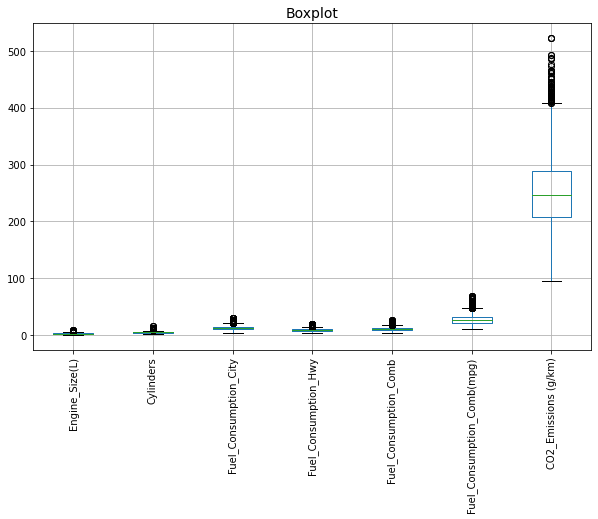

In [23]:
df.boxplot(figsize=(10,6))
plt.title('Boxplot',fontsize=14)
plt.xticks(rotation=90)

In [24]:
## IOR is a technique which is use to remove outliers.
## IQR is the difference between third and first quartile.
#IQR -> Q3 -Q1
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
IQR

Engine_Size(L)                 1.7
Cylinders                      2.0
Fuel_Consumption_City          4.5
Fuel_Consumption_Hwy           2.7
Fuel_Consumption_Comb          3.7
Fuel_Consumption_Comb(mpg)    10.0
CO2_Emissions (g/km)          80.0
dtype: float64

In [25]:
# Q1-1.5*IQR to Q3+1.5*IQR
df2=df[~((df<(Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]
df2.shape

(6826, 12)

We got 6826 rows after removing the outliers.Almost 559 rows are removes in outliers.

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'Engine_Size(L)'),
  Text(2, 0, 'Cylinders'),
  Text(3, 0, 'Fuel_Consumption_City'),
  Text(4, 0, 'Fuel_Consumption_Hwy'),
  Text(5, 0, 'Fuel_Consumption_Comb'),
  Text(6, 0, 'Fuel_Consumption_Comb(mpg)'),
  Text(7, 0, 'CO2_Emissions (g/km)')])

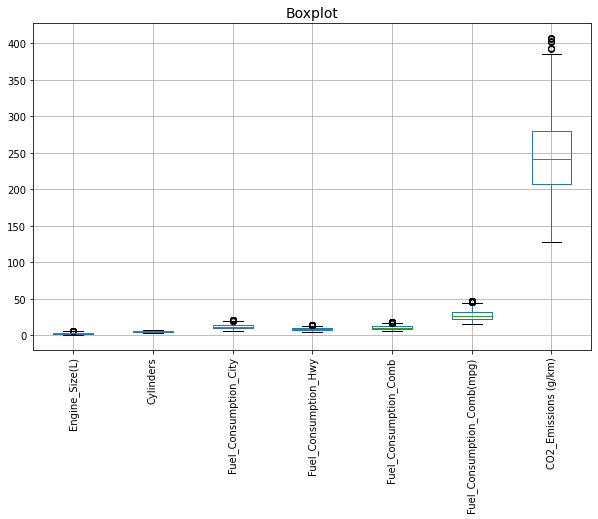

In [26]:
## Checking outliers by using boxplot whether is it remove or not.
df2.boxplot(figsize=(10,6))
plt.title('Boxplot',fontsize=14)
plt.xticks(rotation=90)

As you see in the above boxplot some outliers are still remaining.We can clip them futher for better results.

### 2.6 Data Visualization
Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

In the world of Big Data, data visualization tools and technologies are essential to analyze massive amounts of information and make data-driven decisions.

Data visualization is another form of visual art that grabs our interest and keeps our eyes on the message. When we see a chart, we quickly see trends and outliers. If we can see something, we internalize it quickly. It’s storytelling with a purpose. If you’ve ever stared at a massive spreadsheet of data and couldn’t see a trend, you know how much more effective a visualization can be.

Lets start visualizing the data with the help of matplotlib and seaborn libraries.

In [27]:
### Storeing above outliers removed data as data variable
data=df2

In [28]:
data.head()

Make    Model Vehicle_Class  Engine_Size(L)  Cylinders Transmission  \
0  ACURA      ILX       COMPACT             2.0          4          AS5   
1  ACURA      ILX       COMPACT             2.4          4           M6   
3  ACURA  MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA  RDX AWD   SUV - SMALL             3.5          6          AS6   
5  ACURA      RLX      MID-SIZE             3.5          6          AS6   

  Fuel_Type  Fuel_Consumption_City  Fuel_Consumption_Hwy  \
0         Z                    9.9                   6.7   
1         Z                   11.2                   7.7   
3         Z                   12.7                   9.1   
4         Z                   12.1                   8.7   
5         Z                   11.9                   7.7   

   Fuel_Consumption_Comb  Fuel_Consumption_Comb(mpg)  CO2_Emissions (g/km)  
0                    8.5                          33                   196  
1                    9.6                          29                   221  
3                   11.1                          25                   255  
4                   10.6                          27                   244  
5                   10.0                          28                   230

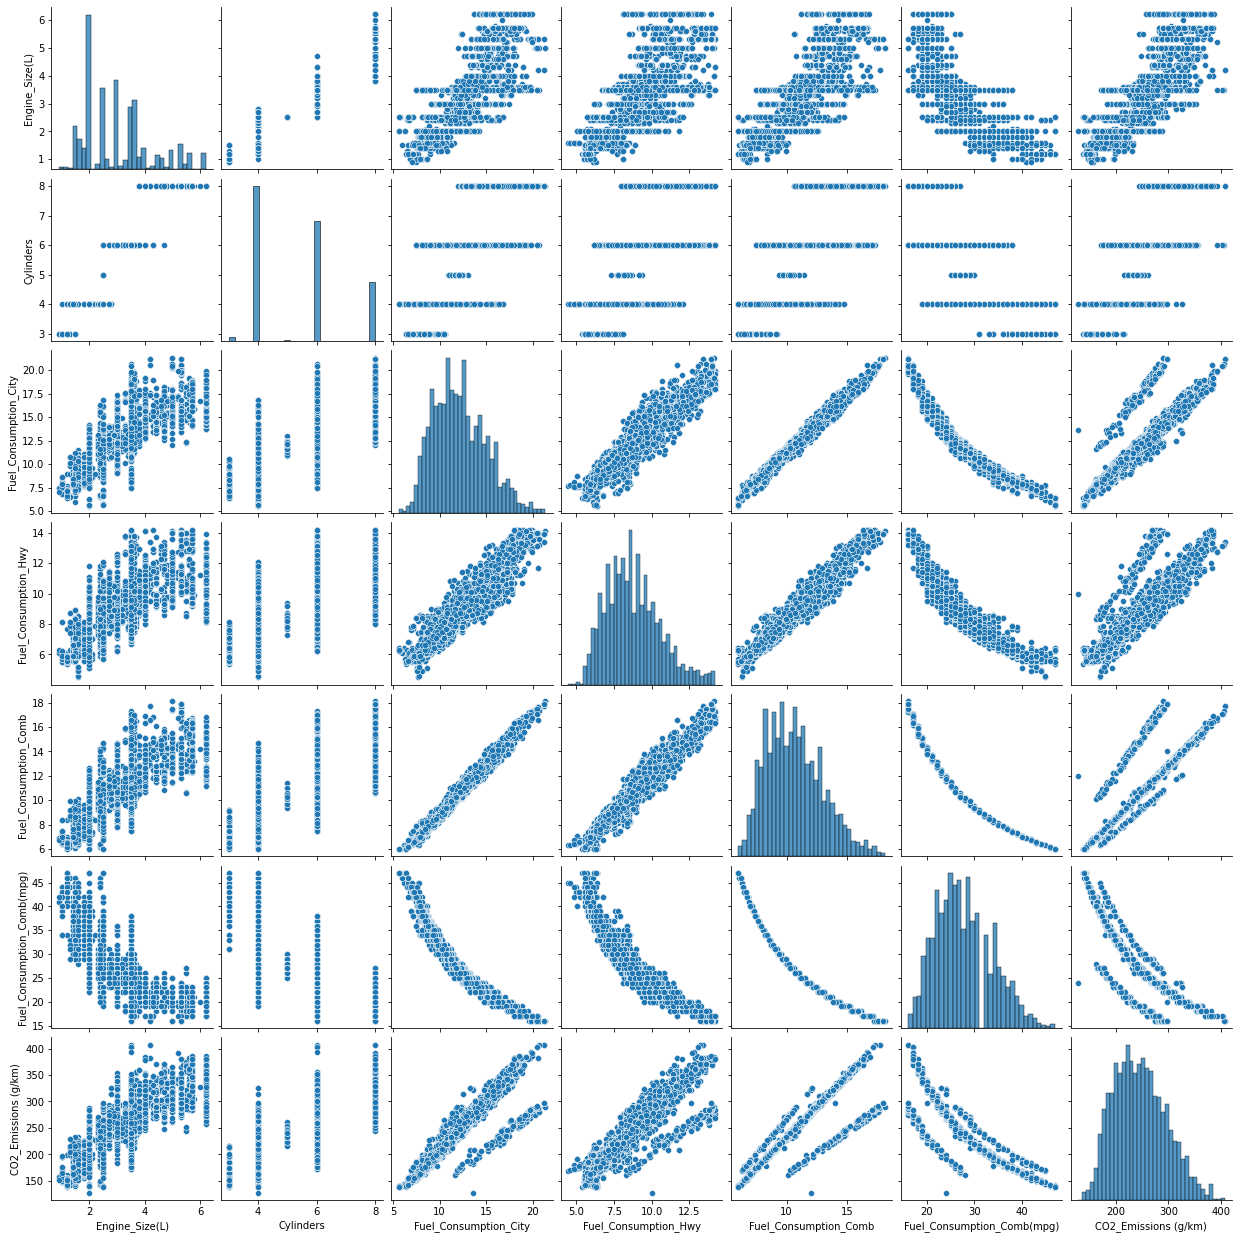

In [29]:
sns.pairplot(data)

##### Pairplot gives the multiple subplots of relation of each column wth another columns related to data.

Text(0.5, 1.0, 'Make')

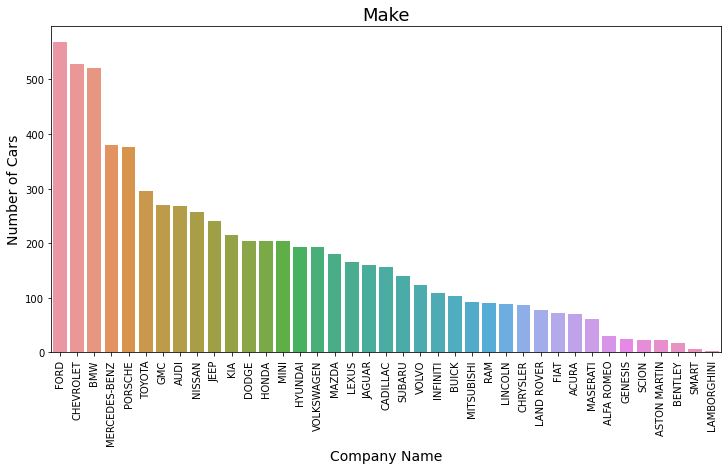

In [30]:
## Make values plotting with index

x=data['Make'].value_counts().index
y=data['Make'].value_counts().values
plt.figure(figsize = (12,6))
sns.barplot(x,y)
plt.xlabel('Company Name',fontsize=14)
plt.ylabel('Number of Cars',fontsize=14)
plt.xticks(rotation='vertical')
plt.title('Make',fontsize=18)

#####  From the above plot, we can say that we have maximum number of cars from FORD,BMW & CHVEROLET Company  and minimum from  ,BENTLY,SMART & LAMBORGINI Company.

Text(0.5, 1.0, 'Make vs CO2_Emissions (g/km)')

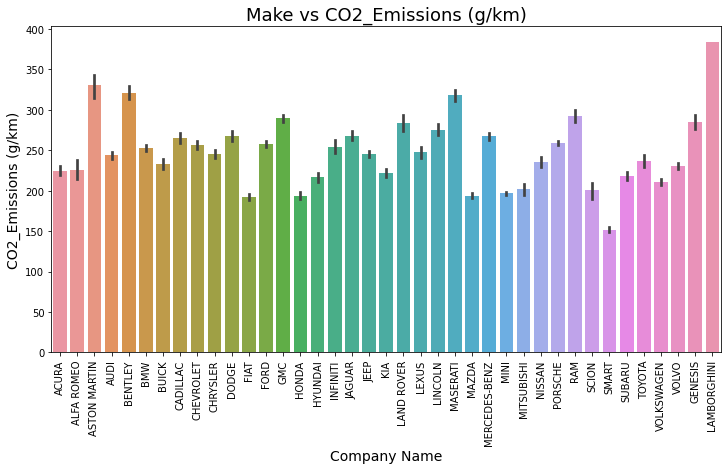

In [31]:
## Make with CO2 Emission

x=data['Make']
y=data["CO2_Emissions (g/km)"]
plt.figure(figsize=(12,6))
sns.barplot(x,y)
plt.xlabel('Company Name',fontsize=14)
plt.ylabel("CO2_Emissions (g/km)",fontsize=14)
plt.xticks(rotation='vertical')
plt.title('Make vs CO2_Emissions (g/km)',fontsize=18)

###### From the above barplot we can say that 'Lamborghini' company cars has the highest amount of Co2 emission and 'Smart" company cars has the lowest amount of Co2 Emission and rest are in between them.

Text(0.5, 1.0, 'Make vs Fuel_Consumption_Hwy')

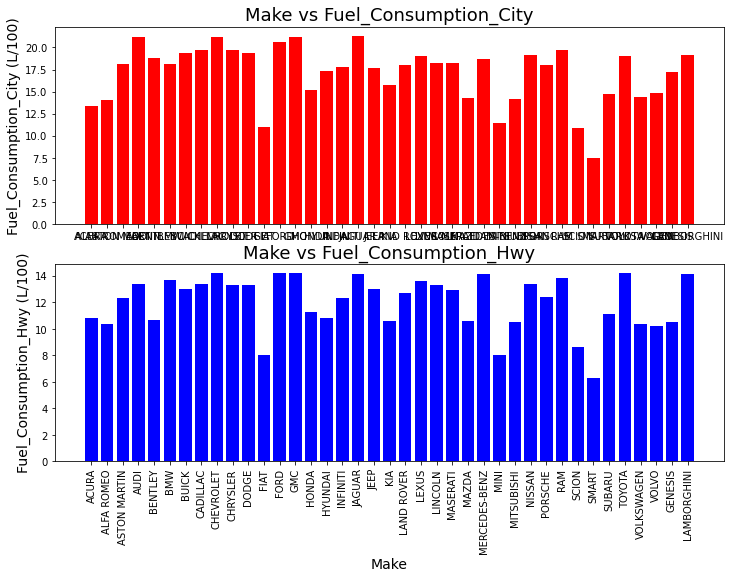

In [32]:
## Make vs Fuel Consumption City.
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
x=data['Make']
y=data["Fuel_Consumption_City"]
plt.bar(x,y,color='r')
plt.ylabel("Fuel_Consumption_City (L/100)",fontsize=14)
plt.title('Make vs Fuel_Consumption_City',fontsize=18)

## Make with FUel Consumption Hwy.
plt.subplot(2,1,2)
x1=data['Make']
y1=data["Fuel_Consumption_Hwy"]
plt.bar(x1,y1,color='b')
plt.xlabel('Make',fontsize=14)
plt.ylabel("Fuel_Consumption_Hwy (L/100)",fontsize=14)
plt.xticks(rotation="vertical")
plt.title('Make vs Fuel_Consumption_Hwy',fontsize=18)

###### From the above subplots we can clearly say that there are varities in fule consumption in city and hwy with the same company.Sometimes it is high in city and low on hwy and vice versa with same Company.

Text(0.5, 1.0, 'Make')

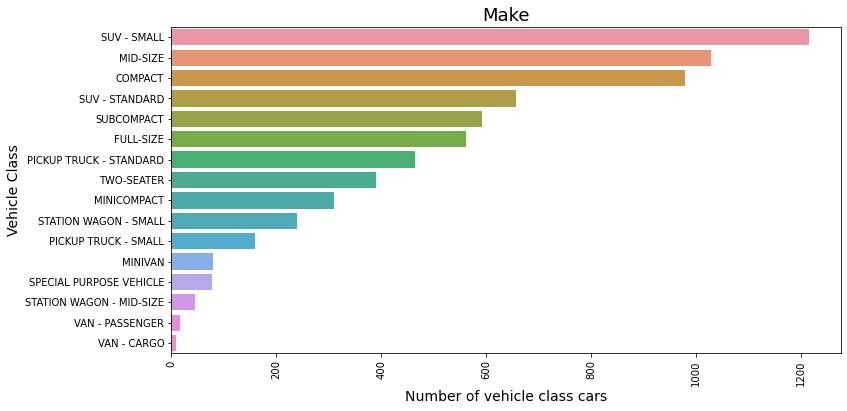

In [33]:
## Plotting Vehicle Class values with index. 

x=data['Vehicle_Class'].value_counts().index
y=data['Vehicle_Class'].value_counts().values
plt.figure(figsize = (12,6))
sns.barplot(y,x)
plt.xlabel( 'Number of vehicle class cars',fontsize=14)
plt.ylabel('Vehicle Class',fontsize=14)
plt.xticks(rotation='vertical')
plt.title('Make',fontsize=18)

###### From the above plot we can conclude that 'SUV-Small' Vehicle class has maximum no of cars ascomapre to all others and 'Van_Cargo'Vehicle class has less no of cars.

Text(0.5, 1.0, 'Vehicle Class vs CO2 Emission')

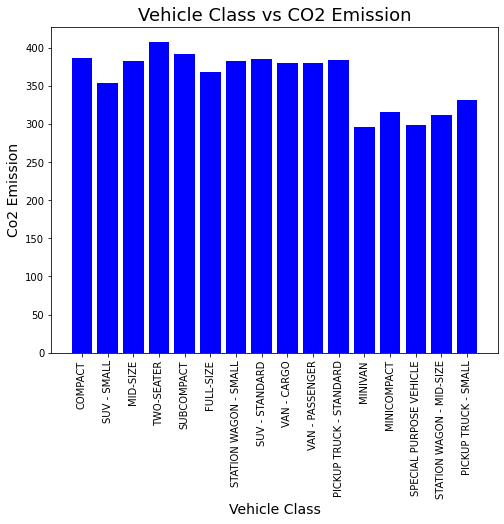

In [34]:
## Vehicle Class vs CO2 Emission

x=data["Vehicle_Class"]
y=data["CO2_Emissions (g/km)"]
plt.figure(figsize=(8,6))
plt.bar(x,y,color='b')
plt.xticks(rotation='vertical')
plt.xlabel('Vehicle Class',fontsize=14)
plt.ylabel('Co2 Emission',fontsize=14)
plt.title('Vehicle Class vs CO2 Emission',fontsize=18)

##### From the above barplot we can sat that two Seater vehicle class has the maximum amount of CO2 emission and Minivan has lowest amount of CO2 emission.

No handles with labels found to put in legend.


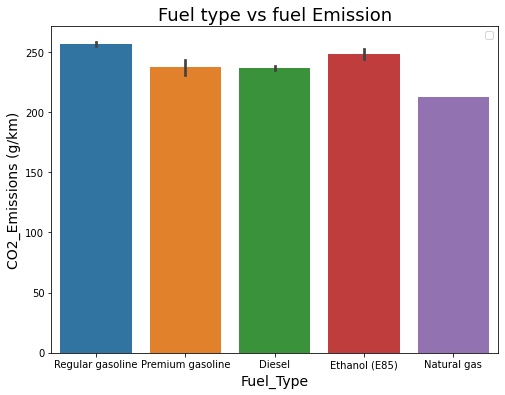

In [35]:
## Fuel Type vs CO2 Emission

x=data["Fuel_Type"]
y=data["CO2_Emissions (g/km)"]
plt.figure(figsize=(8,6))
sns.barplot(x,y)
plt.xlabel("Fuel_Type",fontsize=14)
plt.ylabel("CO2_Emissions (g/km)",fontsize=14)
plt.xticks([0,1,2,3,4],['Regular gasoline','Premium gasoline','Diesel','Ethanol (E85)','Natural gas'])
plt.title('Fuel type vs fuel Emission',fontsize=18)
plt.legend()

###### From above plot we can conclude that - 
   1. Cars with Natural Gases as Fuel has minimum CO2_Emissions as compared to cars with other types of Fuel Type
   2. Cars with Regular gasoline as Fuel has maximum CO2_Emissions as compared to cars with other types of Fuel Type

Text(0.5, 1.0, 'Fuel type vs fuel Consumption')

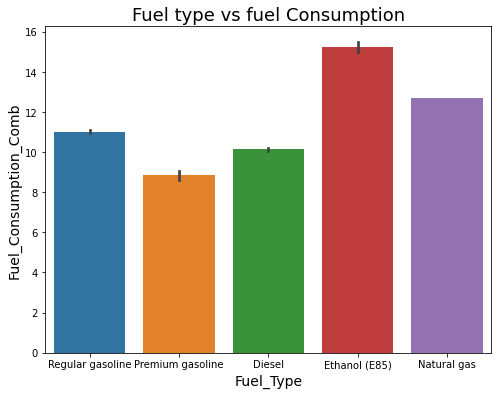

In [36]:
## Fuel Type vs Fuel Consumption Combo

x=data["Fuel_Type"]
y=data["Fuel_Consumption_Comb"]
plt.figure(figsize=(8,6))
sns.barplot(x,y)
plt.xlabel("Fuel_Type",fontsize=14)
plt.ylabel("Fuel_Consumption_Comb",fontsize=14)
plt.xticks([0,1,2,3,4],['Regular gasoline','Premium gasoline','Diesel','Ethanol (E85)','Natural gas'])
plt.title('Fuel type vs fuel Consumption',fontsize=18)

###### 'Ethanol' fuel has the maximum amount of  consumption (city and hwy both) and 'Premium gasoline' fuel has less amount of fuel consumption (city and hwy both) as compare to other fuel.

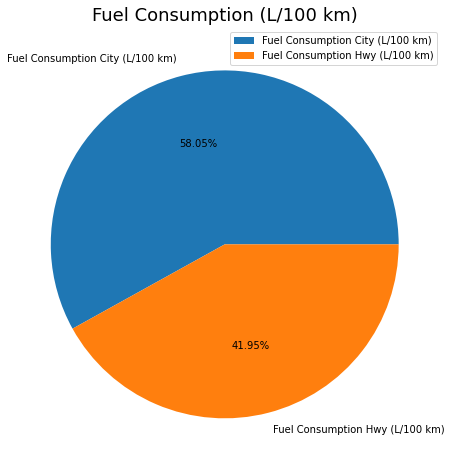

In [37]:
## Fuel_Consumption_City vs Fuel_Consumption_Hwy

x1=data["Fuel_Consumption_City"].sum()
x2=data["Fuel_Consumption_Hwy"].sum()
plt.figure(figsize=(10,8))
plt.pie([x1,x2],labels=["Fuel Consumption City (L/100 km)","Fuel Consumption Hwy (L/100 km)"],autopct="%1.2f%%")
plt.title('Fuel Consumption (L/100 km)',fontsize=18)
plt.legend(loc="best")
plt.show()

##### From the above pie chart we can say that maximun amount of fuel consumption are in city 58.05% as compare to highways 41.95%.

Text(0.5, 1.0, 'Transmission vs Fuel_Consumption_Hwy')

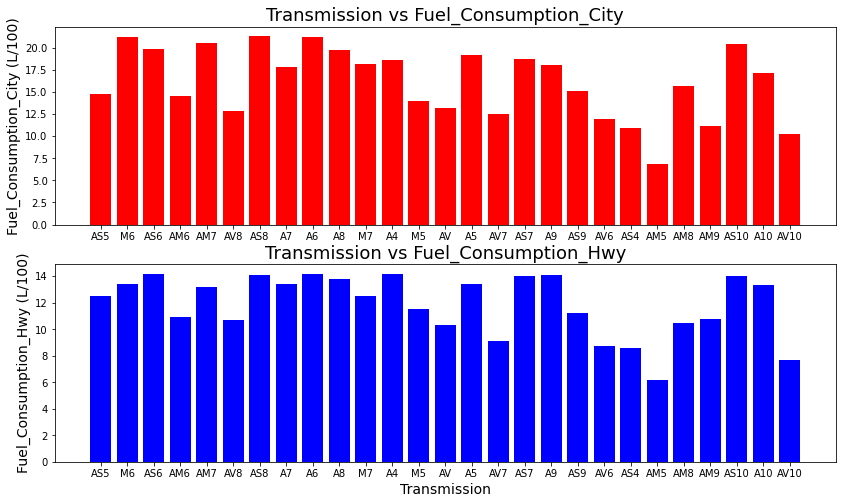

In [38]:
## Transmission vs Fuel Consumption City
plt.figure(figsize=(14,8))
plt.subplot(2,1,1)
x=data['Transmission']
y=data["Fuel_Consumption_City"]
plt.bar(x,y,color='r')
plt.ylabel("Fuel_Consumption_City (L/100)",fontsize=14)
plt.title('Transmission vs Fuel_Consumption_City',fontsize=18)

## Transmission vs Fuel Consumption Hwy
plt.subplot(2,1,2)
x1=data['Transmission']
y1=data["Fuel_Consumption_Hwy"]
plt.bar(x1,y1,color='b')
plt.xlabel('Transmission',fontsize=14)
plt.ylabel("Fuel_Consumption_Hwy (L/100)",fontsize=14)
plt.title('Transmission vs Fuel_Consumption_Hwy',fontsize=18)

     A = Automatic
    AM = Automated manual
    AS = Automatic with select shift
    AV = Continuously variable
     M = Manual
    3 - 10 = Number of gears 
###### From the above subplots we can clearly say that there are varities in fule consumption in city and hwy with the same Transmission Model.Sometimes it is high in city and low on hwy and vice versa with same Transmission Model.

Text(0.5, 1.0, 'Transmission vs Fuel Emission (g/km)')

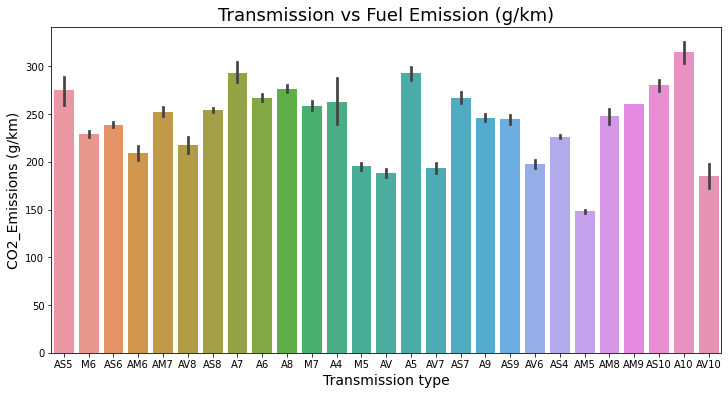

In [39]:
## Transmission vs CO2 Emission

x=data["Transmission"]
y=data["CO2_Emissions (g/km)"]
plt.figure(figsize=(12,6))
sns.barplot(x,y)
plt.xlabel('Transmission type',fontsize=14)
plt.ylabel('CO2_Emissions (g/km)',fontsize=14)
plt.title('Transmission vs Fuel Emission (g/km)',fontsize=18)

     A = Automatic
    AM = Automated manual
    AS = Automatic with select shift
    AV = Continuously variable
    M = Manual
    3 - 10 = Number of gears 
##### From the above plot we can conclude that transmission  A10 has maximum amount CO2 emission and AM5  has lowest amount CO2 emission

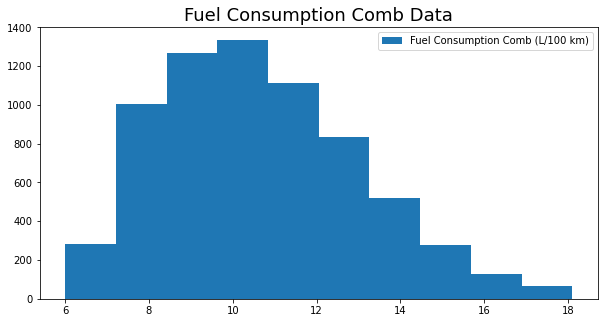

In [40]:
## Histogram of Fuel_Consumption_Comb

plt.figure(figsize=(10,5))
x=data["Fuel_Consumption_Comb"]
plt.hist(x,label="Fuel Consumption Comb (L/100 km)")
plt.title("Fuel Consumption Comb Data",fontsize=18)
plt.legend()

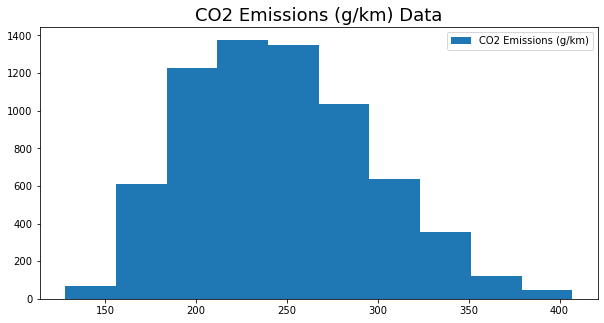

In [41]:
## Histogram of CO2_Emissions (g/km)

plt.figure(figsize=(10,5))
x=data["CO2_Emissions (g/km)"]
plt.hist(x,label="CO2 Emissions (g/km)")
plt.title("CO2 Emissions (g/km) Data",fontsize=18)
plt.legend()

Text(0.5, 1.0, 'Cylinders vs Fuel Emission (g/km)')

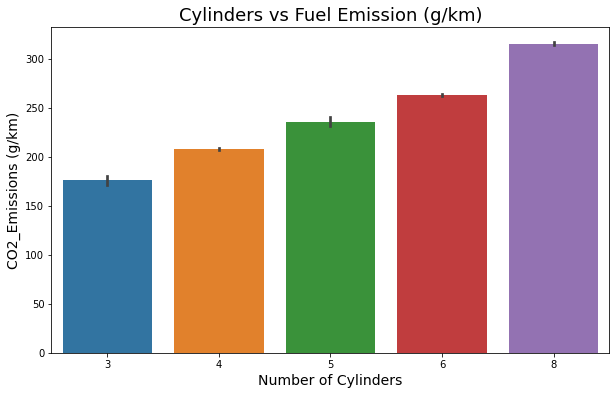

In [42]:
## Cylinders vs CO2 Emission (g/km)

x=data["Cylinders"]
y=data["CO2_Emissions (g/km)"]
plt.figure(figsize=(10,6))
sns.barplot(x,y)
plt.xlabel('Number of Cylinders',fontsize=14)
plt.ylabel('CO2_Emissions (g/km)',fontsize=14)
plt.title('Cylinders vs Fuel Emission (g/km)',fontsize=18)

###### From the above plot, we can conclude that with the increase in "Number of Cylinders" , CO2 Emissions increases.

Text(0.5, 1.0, 'Fuel_Consumption_Comb(mpg) vs CO2_Emissions (g/km)')

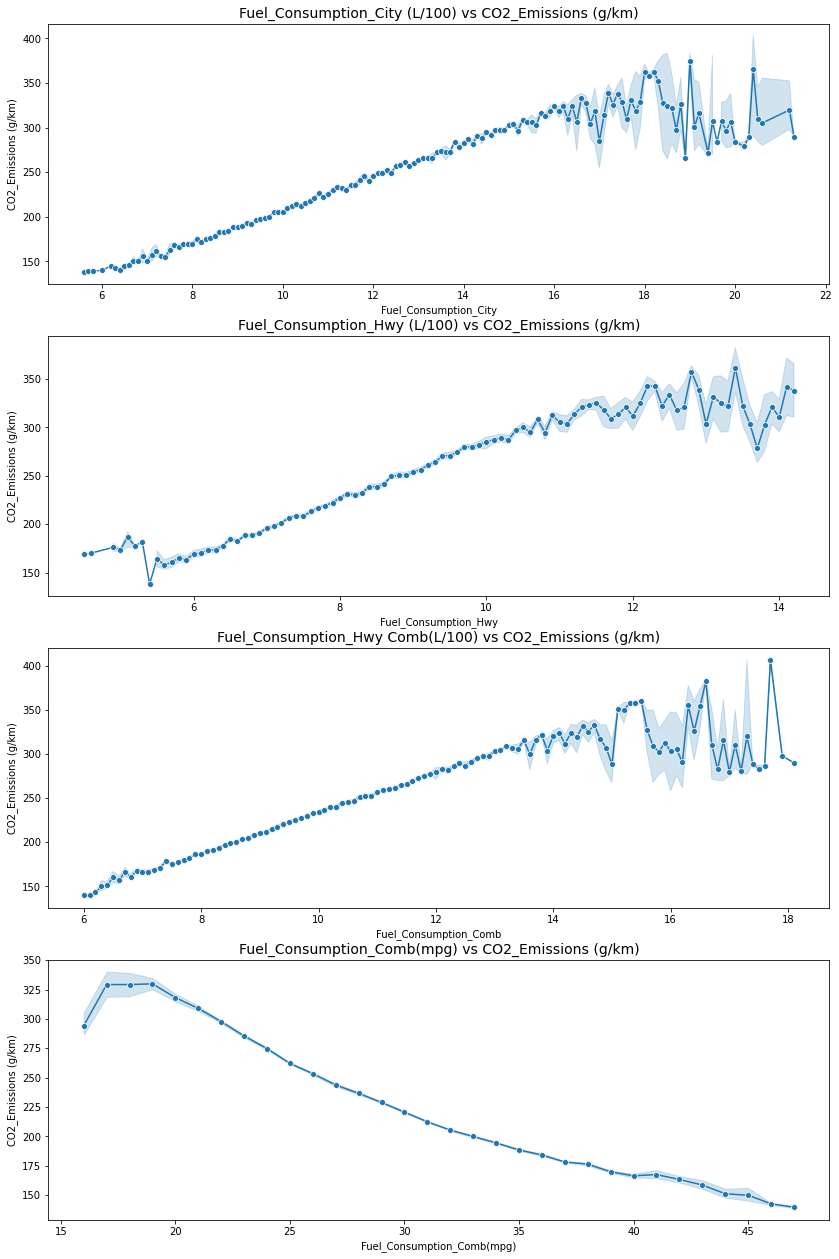

In [43]:
plt.figure(figsize=(14,22))

## Lineplot of Fuel_Consumption_City vs CO2_Emissions (g/km)
plt.subplot(4,1,1)
sns.lineplot(x=data["Fuel_Consumption_City"],y=data["CO2_Emissions (g/km)"],marker="o")
plt.title("Fuel_Consumption_City (L/100) vs CO2_Emissions (g/km)",fontsize=14)

##  Lineplot of Fuel_Consumption_Hwy vs CO2_Emissions (g/km)
plt.subplot(4,1,2)
sns.lineplot(x=data["Fuel_Consumption_Hwy"],y=data["CO2_Emissions (g/km)"],marker="o")
plt.title("Fuel_Consumption_Hwy (L/100) vs CO2_Emissions (g/km)",fontsize=14)

##  Lineplot of Fuel_Consumption_Comb vs CO2_Emissions (g/km)
plt.subplot(4,1,3)
sns.lineplot(x=data["Fuel_Consumption_Comb"],y=data["CO2_Emissions (g/km)"],marker="o")
plt.title("Fuel_Consumption_Hwy Comb(L/100) vs CO2_Emissions (g/km)",fontsize=14)

## ##  Lineplot of Fuel_Consumption_Comb(mpg) vs CO2_Emissions (g/km)
plt.subplot(4,1,4)
sns.lineplot(x=data["Fuel_Consumption_Comb(mpg)"],y=data["CO2_Emissions (g/km)"],marker="o")
plt.title("Fuel_Consumption_Comb(mpg) vs CO2_Emissions (g/km)",fontsize=14)


###### We can conclude following things 
    1.From the first 3 subplots we came to conclusion that as Fuel Consumption (L/100) for city,hwy and comb increases the       co2 emission rate also increases.
    2.From last subplots we came to conclusion that as the Fuel Consumption Comp (Mpg=Mile per gallon) increases the fuel         consumption rate decreases.

### 2.7 Using LabelEncoder to convert categorical (object) type data into numerical data for  outliers clipping and model implementation

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2[["Make","Model","Vehicle_Class","Transmission","Transmission","Fuel_Type"]] = df2[["Make","Model","Vehicle_Class",
"Transmission","Transmission","Fuel_Type"]].apply(le.fit_transform)
df2.head() 

Make  Model  Vehicle_Class  Engine_Size(L)  Cylinders  Transmission  \
0     0    973              0             2.0          4            14   
1     0    973              0             2.4          4            25   
3     0   1135             11             3.5          6            15   
4     0   1371             11             3.5          6            15   
5     0   1382              2             3.5          6            15   

   Fuel_Type  Fuel_Consumption_City  Fuel_Consumption_Hwy  \
0          4                    9.9                   6.7   
1          4                   11.2                   7.7   
3          4                   12.7                   9.1   
4          4                   12.1                   8.7   
5          4                   11.9                   7.7   

   Fuel_Consumption_Comb  Fuel_Consumption_Comb(mpg)  CO2_Emissions (g/km)  
0                    8.5                          33                   196  
1                    9.6                          29                   221  
3                   11.1                          25                   255  
4                   10.6                          27                   244  
5                   10.0                          28                   230

In [45]:
### Checking Shape of data after implementing labelEncoder

df2.shape

(6826, 12)

In [46]:
### Checking Dtypes after Label Encoding

df2.dtypes

Make                            int32
Model                           int32
Vehicle_Class                   int32
Engine_Size(L)                float64
Cylinders                       int64
Transmission                    int32
Fuel_Type                       int32
Fuel_Consumption_City         float64
Fuel_Consumption_Hwy          float64
Fuel_Consumption_Comb         float64
Fuel_Consumption_Comb(mpg)      int64
CO2_Emissions (g/km)            int64
dtype: object

###### Here we convert all categorical data into numerical data by using label encoder.

### 2.8 Clipping Outliers

In [47]:
## Here we use a function for clipping the outliers
## In clipping we clip the outliers by lower and upper quantile value.we are not removing it here.

def clipvalues(df,lower,upper):
    for col in df.columns:
        l=df[col].quantile(lower)
        u=df[col].quantile(upper)
        df[col]=df[col].clip(l,u)
    return df   

Text(0.5, 1.0, 'Boxplot')

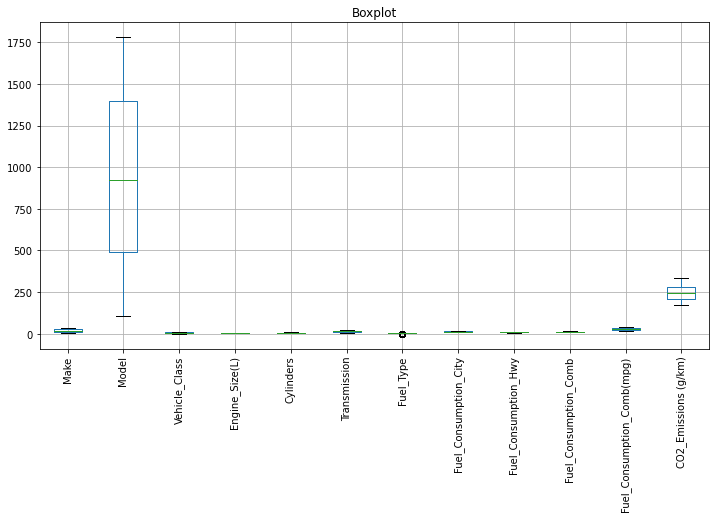

In [48]:
df3=clipvalues(df2,0.05,0.95)
df3.boxplot(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Boxplot')

In [49]:
df3.shape

(6826, 12)

shape of the data before and after clipping  remains same.

### 2.8 Data Corelation

In [50]:
df3.columns

Index(['Make', 'Model', 'Vehicle_Class', 'Engine_Size(L)', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb',
       'Fuel_Consumption_Comb(mpg)', 'CO2_Emissions (g/km)'],
      dtype='object')

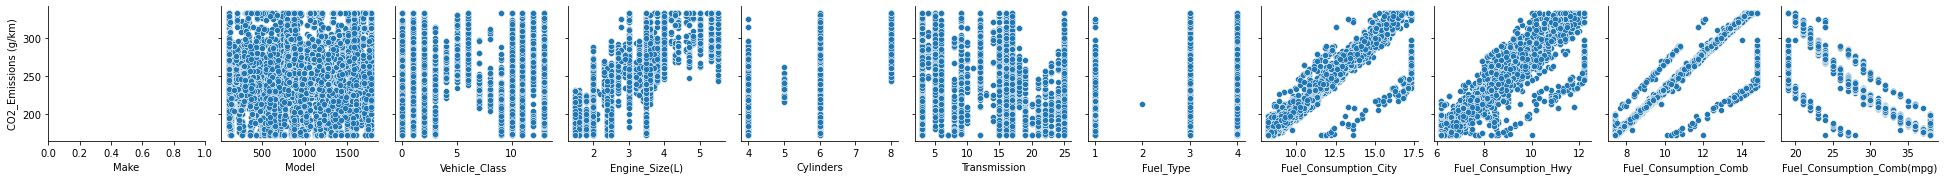

In [51]:
### Checking the graphical relation of all columns with our targeted column 

sns.pairplot(x_vars=[ 'Make', 'Model', 'Vehicle_Class', 'Engine_Size(L)', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb',
       'Fuel_Consumption_Comb(mpg)'],y_vars=['CO2_Emissions (g/km)'],data=df3)

###### From the above pairplot we can clearly say that some columns like Fule Consumption city,hwy  has linear relation with our targeted column and some columns like make,model etc has no relation with the targeted column.

In [52]:
df3.corr()

Make     Model  Vehicle_Class  Engine_Size(L)  \
Make                        1.000000  0.006875      -0.002441       -0.125884   
Model                       0.006875  1.000000       0.191436        0.080045   
Vehicle_Class              -0.002441  0.191436       1.000000        0.128455   
Engine_Size(L)             -0.125884  0.080045       0.128455        1.000000   
Cylinders                  -0.157273  0.053770       0.097379        0.944510   
Transmission                0.167941  0.003245      -0.127346       -0.316528   
Fuel_Type                   0.046202 -0.072939       0.001804        0.062497   
Fuel_Consumption_City      -0.189559  0.106345       0.194980        0.840698   
Fuel_Consumption_Hwy       -0.100418  0.179590       0.302316        0.772395   
Fuel_Consumption_Comb      -0.162745  0.132425       0.232831        0.829389   
Fuel_Consumption_Comb(mpg)  0.164238 -0.119502      -0.245473       -0.801828   
CO2_Emissions (g/km)       -0.143367  0.135340       0.256728        0.842509   

                            Cylinders  Transmission  Fuel_Type  \
Make                        -0.157273      0.167941   0.046202   
Model                        0.053770      0.003245  -0.072939   
Vehicle_Class                0.097379     -0.127346   0.001804   
Engine_Size(L)               0.944510     -0.316528   0.062497   
Cylinders                    1.000000     -0.268876   0.141804   
Transmission                -0.268876      1.000000   0.192331   
Fuel_Type                    0.141804      0.192331   1.000000   
Fuel_Consumption_City        0.818820     -0.328470   0.013757   
Fuel_Consumption_Hwy         0.735766     -0.330808  -0.026251   
Fuel_Consumption_Comb        0.802880     -0.334282   0.003927   
Fuel_Consumption_Comb(mpg)  -0.774516      0.339883  -0.055455   
CO2_Emissions (g/km)         0.826391     -0.316838   0.128513   

                            Fuel_Consumption_City  Fuel_Consumption_Hwy  \
Make                                    -0.189559             -0.100418   
Model                                    0.106345              0.179590   
Vehicle_Class                            0.194980              0.302316   
Engine_Size(L)                           0.840698              0.772395   
Cylinders                                0.818820              0.735766   
Transmission                            -0.328470             -0.330808   
Fuel_Type                                0.013757             -0.026251   
Fuel_Consumption_City                    1.000000              0.935396   
Fuel_Consumption_Hwy                     0.935396              1.000000   
Fuel_Consumption_Comb                    0.992237              0.970617   
Fuel_Consumption_Comb(mpg)              -0.972140             -0.949274   
CO2_Emissions (g/km)                     0.936921              0.918305   

                            Fuel_Consumption_Comb  Fuel_Consumption_Comb(mpg)  \
Make                                    -0.162745                    0.164238   
Model                                    0.132425                   -0.119502   
Vehicle_Class                            0.232831                   -0.245473   
Engine_Size(L)                           0.829389                   -0.801828   
Cylinders                                0.802880                   -0.774516   
Transmission                            -0.334282                    0.339883   
Fuel_Type                                0.003927                   -0.055455   
Fuel_Consumption_City                    0.992237                   -0.972140   
Fuel_Consumption_Hwy                     0.970617                   -0.949274   
Fuel_Consumption_Comb                    1.000000                   -0.979556   
Fuel_Consumption_Comb(mpg)              -0.979556                    1.000000   
CO2_Emissions (g/km)                     0.946959                   -0.945469   

                            CO2_Emissions (g/km)  
Make                                  

<AxesSubplot:>

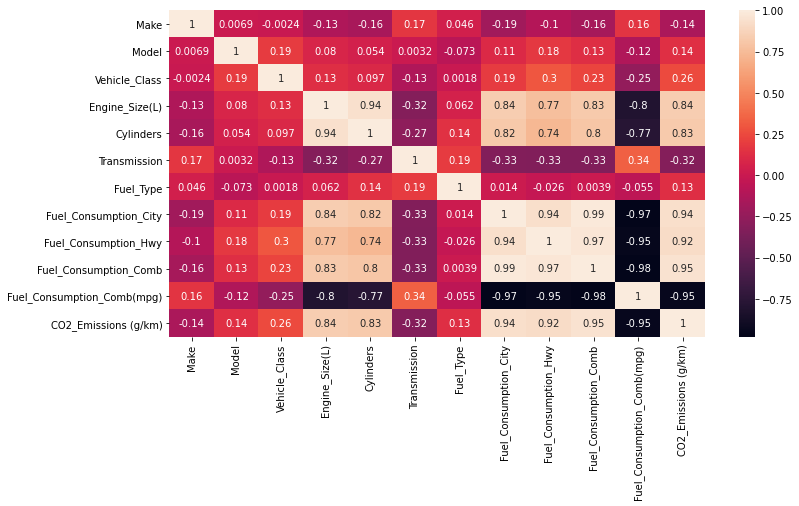

In [53]:
plt.figure(figsize=(12,6))
sns.heatmap(df3.corr(),data=df3,annot=True)

##### From the above table we clerly see that some independent columns like Engine Size,Fuel Counsumption city,Fuel Consumption hwy,Fuel Consumption comb are highly corelated with each other.means there is high multicolinearity in independent columns.

In [54]:
### Checking Corelation with targeted column
df3.corr()['CO2_Emissions (g/km)'].sort_values()

Fuel_Consumption_Comb(mpg)   -0.945469
Transmission                 -0.316838
Make                         -0.143367
Fuel_Type                     0.128513
Model                         0.135340
Vehicle_Class                 0.256728
Cylinders                     0.826391
Engine_Size(L)                0.842509
Fuel_Consumption_Hwy          0.918305
Fuel_Consumption_City         0.936921
Fuel_Consumption_Comb         0.946959
CO2_Emissions (g/km)          1.000000
Name: CO2_Emissions (g/km), dtype: float64

## 3. Linear Regression
In statistics, linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.

For more information - https://en.wikipedia.org/wiki/Linear_regression

In [55]:
## x contain all independent variable columns and y contain dependent variable column.
## Here we drop some columns for x as these columns contains multiple unique values which is of no use.

x=df3.drop(columns=['CO2_Emissions (g/km)','Make','Model'])
y=df3["CO2_Emissions (g/km)"]

#### Model on Normal Data

In [56]:
## Training on normal data
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [57]:
## Testing on normal data
ypred=model.predict(x)

In [58]:
## Evaluation on normal data
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y,ypred).round(3)
mae=mean_absolute_error(y,ypred).round(3)
rmse=np.sqrt(mse).round(3)
r2_score=r2_score(y,ypred).round(3)
print("Mean Squared Error =", mse)
print("Mean Absolute Error =", mae)
print("Root Mean Squared Error =", rmse)
print("R2_Score Value =", r2_score)

Mean Squared Error = 146.607
Mean Absolute Error = 7.437
Root Mean Squared Error = 12.108
R2_Score Value = 0.933


#### Splitting of data in train and test

In [59]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)
xtrain.head()

Vehicle_Class  Engine_Size(L)  Cylinders  Transmission  Fuel_Type  \
6346              3             3.8          6             9          4   
6204             10             3.0          6             6          4   
96                0             3.0          6             5          4   
1957              9             1.6          4            25          3   
3630             11             2.4          4             6          3   

      Fuel_Consumption_City  Fuel_Consumption_Hwy  Fuel_Consumption_Comb  \
6346                   14.3                  10.9                   12.7   
6204                   12.5                   9.1                   11.0   
96                     11.7                   7.8                    9.9   
1957                    8.4                   6.9                    7.7   
3630                   11.0                   8.0                    9.7   

      Fuel_Consumption_Comb(mpg)  
6346                          22  
6204                          26  
96                            29  
1957                          37  
3630                          29

In [60]:
xtrain.shape,ytrain.shape

((5460, 9), (5460,))

In [61]:
xtest.shape,ytest.shape

((1366, 9), (1366,))

#### Model Training

In [62]:
from sklearn.linear_model import LinearRegression
LRmodel=LinearRegression()
LRmodel.fit(xtrain,ytrain)

LinearRegression()

In [63]:
LRmodel.coef_

array([ 3.95939724e-01,  4.44952045e+00,  3.58811271e+00, -3.39732004e-02,
        4.89169328e+00, -2.30371267e+01, -1.36016662e+01,  4.66921977e+01,
       -3.08464805e+00])

In [64]:
LRmodel.intercept_

182.61815664579578

#### Model Testing

In [65]:
LRypred=LRmodel.predict(xtest)
LRypred

array([231.31231664, 189.52485315, 320.29013377, ..., 254.18922724,
       222.87853375, 305.42059682])

#### Model Evaluation

In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(ytest,LRypred).round(3)
mae=mean_absolute_error(ytest,LRypred).round(3)
rmse=np.sqrt(mse).round(3)
r2_score=r2_score(ytest,LRypred).round(3)
print("Mean Squared Error =", mse)
print("Mean Absolute Error =", mae)
print("Root Mean Squared Error =", rmse)
print("R2_Score Value =", r2_score)

Mean Squared Error = 132.352
Mean Absolute Error = 7.022
Root Mean Squared Error = 11.504
R2_Score Value = 0.936


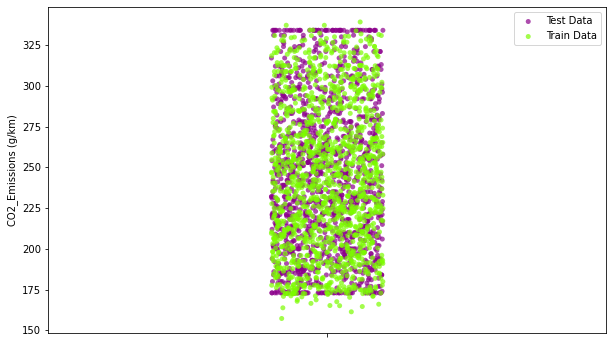

In [67]:
plt.figure(figsize=(10,6))
sns.stripplot(y = ytest, color = 'darkmagenta', alpha = 0.7, label = 'Test Data')
sns.stripplot(y = LRypred, color = 'lawngreen', alpha = 0.7, label = 'Train Data')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Actual values')

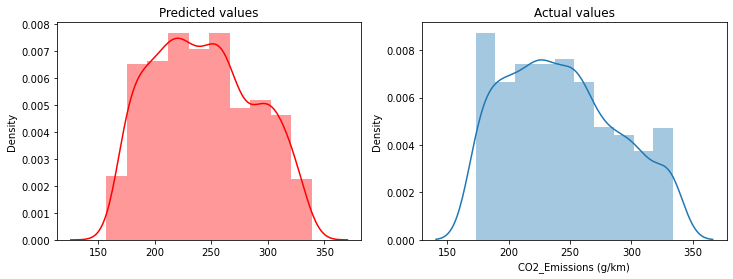

In [68]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(LRypred, bins = 10, color = 'red')
plt.title('Predicted values')
plt.subplot(1,2,2)
sns.distplot(ytest, bins = 10)
plt.title('Actual values')

#### Checking Underfitting and overfitting

In [69]:
print("Linear Regression on Training Data:",LRmodel.score(xtrain,ytrain).round(3))
print("Linear Regression on Testing Data",LRmodel.score(xtest,ytest).round(3))

Linear Regression on Training Data: 0.932
Linear Regression on Testing Data 0.936


Model is perfectly fit.

### 3.2 Assumption of linear Regression

#### 1.Linear Relation
There exists a linear relationship between the independent variable, x, and the dependent variable, y.

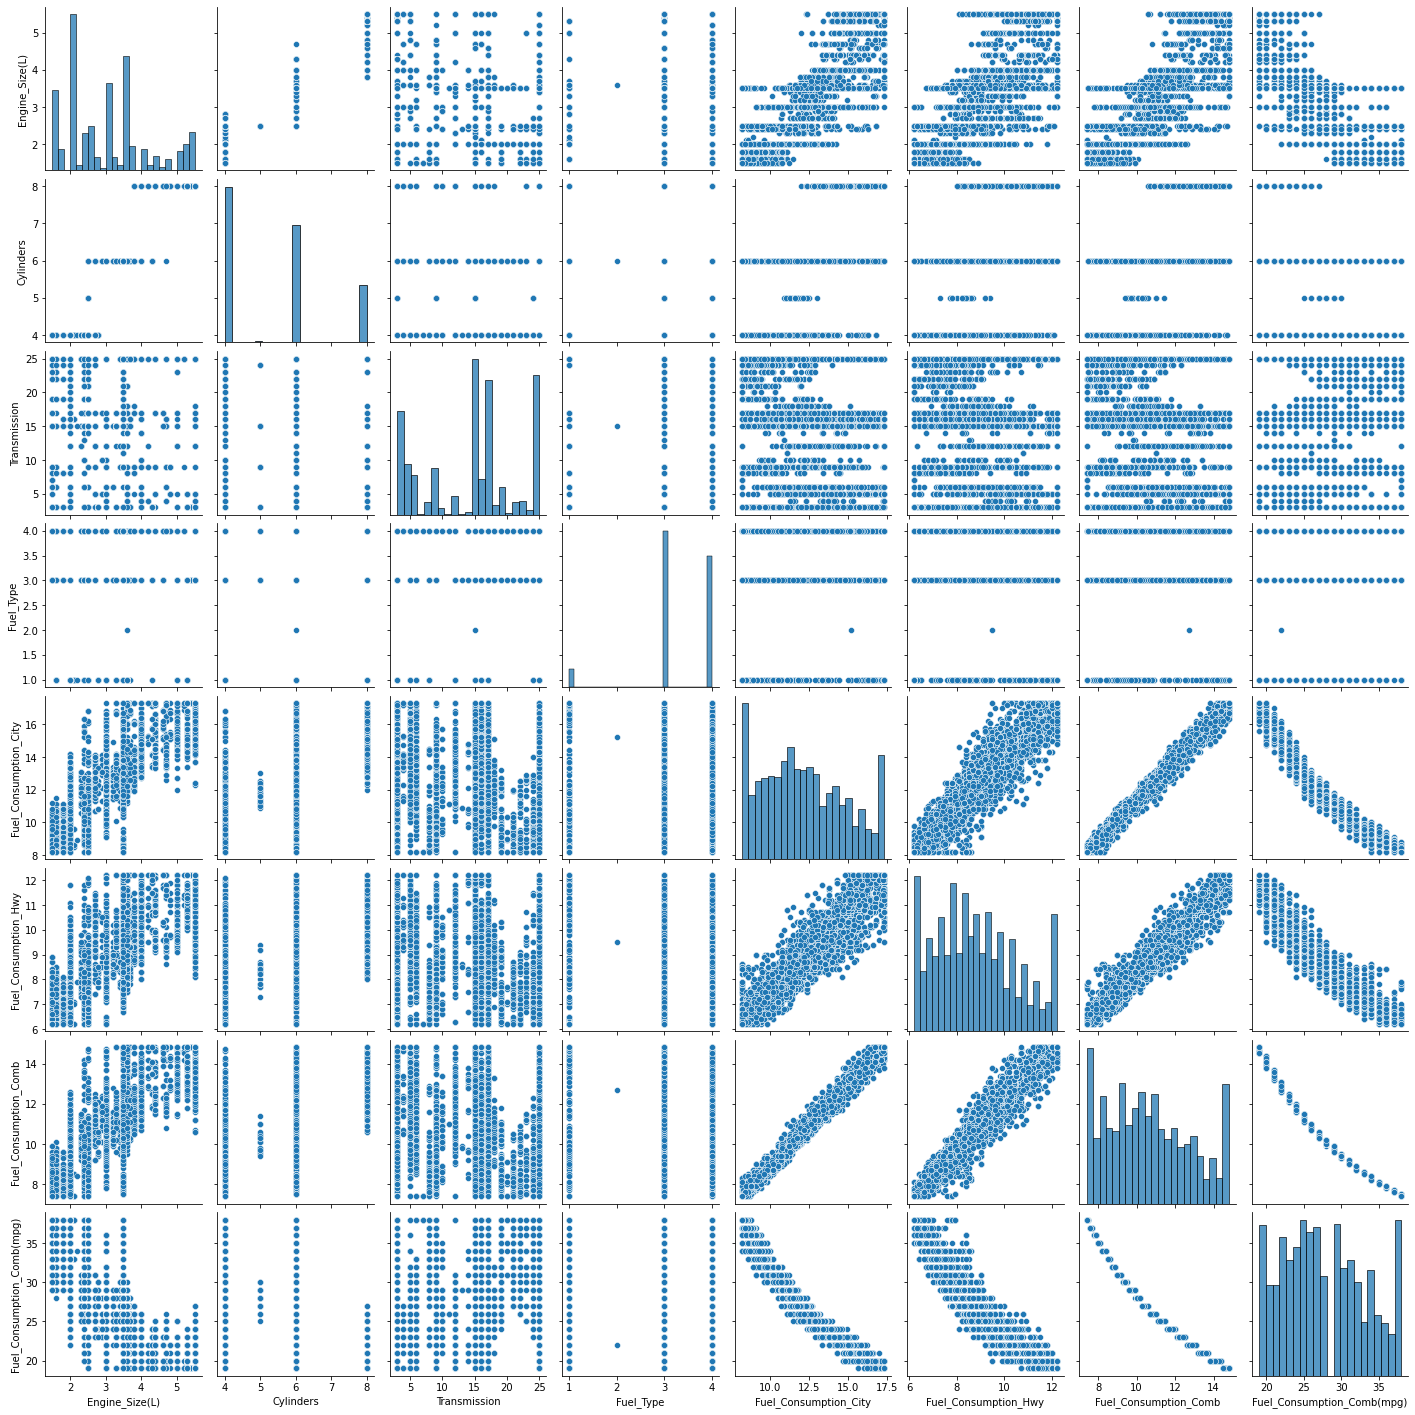

In [70]:
sns.pairplot(df3[['Engine_Size(L)', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb',
       'Fuel_Consumption_Comb(mpg)']])

###### Methods make use when there is no linear Relation
    1.Apply some non linear transformation -> log ,square root
    2.To add another independant var , x=> x^2

#### 2.Homoscedasticity
Residuals should have the constant variance at every level of x This is known as homoscedasticity. When this is not the case, the residuals are said to suffer from heteroscedasticity.

There are three common ways to fix heteroscedasticity:

    1.Transform the dependent variable.
    2.Redefine the dependent variable.
    3.Use weighted regression.

plot the fitted values vs residuals

Text(0.5, 1.0, 'Predicted values vs Residuals')

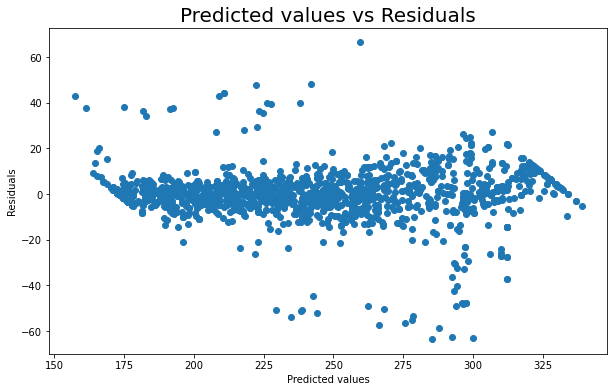

In [71]:
## Findinng Residuals
residuals=ytest.values-LRypred

plt.figure(figsize=(10,6))
plt.scatter(LRypred,residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Predicted values vs Residuals',fontsize=20)

We can clearly see in the above scatterplot the data is hetroscadastic.

#### 3. Normality of Residuals

<AxesSubplot:ylabel='Count'>

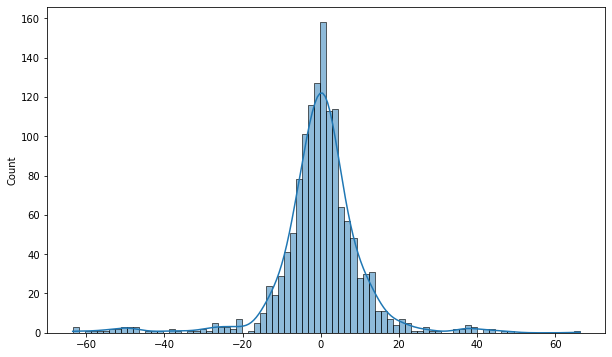

In [72]:
plt.figure(figsize=(10,6))
sns.histplot(residuals,kde=True)

Data is normally distributed.

#### 4.Mean of Residuals

Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero.

In [73]:
print("Mean of Residual is :", np.mean(residuals))

Mean of Residual is : -0.22459662738404904


#### 5.Multicolinearity

In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(df):
    d={}
    for i in range(df.shape[1]):
        d[df.columns[i]]=variance_inflation_factor(df.values,i)
    return d 
get_vif(df3)

{'Make': 4.635577254407643,
 'Model': 4.67453134382948,
 'Vehicle_Class': 3.4259117823156235,
 'Engine_Size(L)': 89.20424101331268,
 'Cylinders': 151.9400107704036,
 'Transmission': 6.251496252981378,
 'Fuel_Type': 26.225288185391182,
 'Fuel_Consumption_City': 10984.153464124725,
 'Fuel_Consumption_Hwy': 3747.5640550569683,
 'Fuel_Consumption_Comb': 27762.766310783474,
 'Fuel_Consumption_Comb(mpg)': 18.877222523972325,
 'CO2_Emissions (g/km)': 395.4010066780738}

###### As 'Fuel_Consumption_City','Fuel_Consumption_Hwy','Fuel_Consumption_Comb'columns has highest Vif value we have to drop one column from this to minimise the multicolinearity.We drop 'Fuel_Consumption_Comb'column for this.

In [75]:
df4=df3.drop(columns=['Fuel_Consumption_Comb','Fuel_Consumption_Comb(mpg)'])
get_vif(df4)

{'Make': 4.408604578310479,
 'Model': 4.609661823451259,
 'Vehicle_Class': 3.3738927164577035,
 'Engine_Size(L)': 76.03802887973856,
 'Cylinders': 141.57514016372002,
 'Transmission': 5.7492386473371715,
 'Fuel_Type': 23.79907272056132,
 'Fuel_Consumption_City': 347.2578469267036,
 'Fuel_Consumption_Hwy': 320.0100960943579,
 'CO2_Emissions (g/km)': 358.9008199219195}

##### We see above by droping 'Fuel_Consumption_Comb' and ''Fuel_Consumption_Comb(mpg)' column the vif value highly decreases.
##### After droping above columns ,multicolinearity still present as we see vif factor value but we cannot drop Fuel Consumption city and Fuel Consumption hwy column because they are imp columns.If we drop that columns also then there is no meaning to perform on remaining data.

### 3.3 Checking model after decreasing multicolinearity

In [76]:
x=df4.drop(columns=['CO2_Emissions (g/km)','Make','Model'])
y=df4["CO2_Emissions (g/km)"]

In [77]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [78]:
model.coef_

array([ 0.39826803,  4.07387485,  3.15816563, -0.12457209,  6.84045281,
        7.4851144 , 10.07304547])

In [79]:
model.intercept_

13.336325915528903

In [80]:
LRMypred=model.predict(xtest)

In [81]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(ytest,LRMypred).round(3)
mae=mean_absolute_error(ytest,LRMypred).round(3)
rmse=np.sqrt(mse).round(3)
r2_score=r2_score(ytest,LRMypred).round(3)
print("Mean Squared Error =", mse)
print("Mean Absolute Error =", mae)
print("Root Mean Squared Error =", rmse)
print("R2_Score Value =", r2_score)

Mean Squared Error = 156.125
Mean Absolute Error = 7.636
Root Mean Squared Error = 12.495
R2_Score Value = 0.925


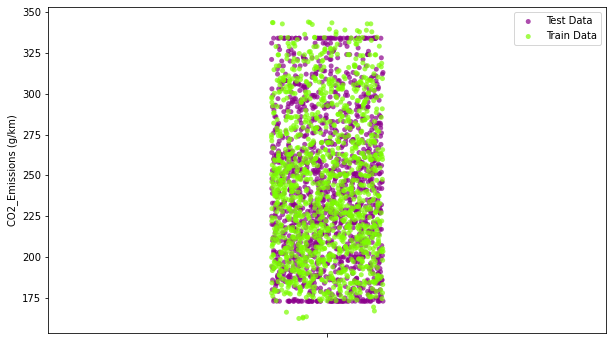

In [82]:
plt.figure(figsize=(10,6))
sns.stripplot(y = ytest, color = 'darkmagenta', alpha = 0.7, label = 'Test Data')
sns.stripplot(y = LRMypred, color = 'lawngreen', alpha = 0.7, label = 'Train Data')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Actual values')

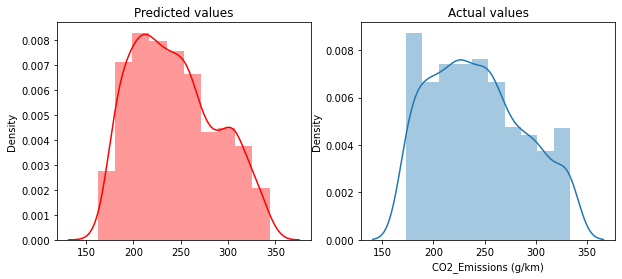

In [83]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(LRMypred, bins = 10, color = 'red')
plt.title('Predicted values')
plt.subplot(1,2,2)
sns.distplot(ytest, bins = 10)
plt.title('Actual values')

### 3.4 Checking model by using Standard Scaler

In [84]:
x=df3.drop(columns=['CO2_Emissions (g/km)','Make','Model'])
y=df3["CO2_Emissions (g/km)"]

In [85]:
## Spliting data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [86]:
##Using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_xtrain=sc.fit_transform(xtrain)
sc_xtest=sc.fit_transform(xtest)

In [87]:
## Model Training
LRmodel_sc=LinearRegression()
LRmodel_sc.fit(sc_xtrain,ytrain)

LinearRegression()

In [88]:
## Testing model
LRSypred=LRmodel_sc.predict(sc_xtest)

In [89]:
## Model Evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(ytest,LRSypred).round(3)
mae=mean_absolute_error(ytest,LRSypred).round(3)
rmse=np.sqrt(mse).round(3)
r2_score=r2_score(ytest,LRSypred).round(3)
print("Mean Squared Error =", mse)
print("Mean Absolute Error =", mae)
print("Root Mean Squared Error =", rmse)
print("R2_Score Value =", r2_score)

Mean Squared Error = 139.295
Mean Absolute Error = 7.168
Root Mean Squared Error = 11.802
R2_Score Value = 0.933


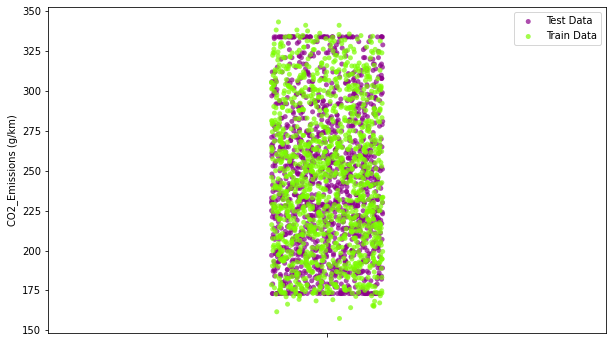

In [90]:
## Stripplot between Train and test data
plt.figure(figsize=(10,6))
sns.stripplot(y = ytest, color = 'darkmagenta', alpha = 0.7, label = 'Test Data')
sns.stripplot(y = LRSypred, color = 'lawngreen', alpha = 0.7, label = 'Train Data')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Actual values')

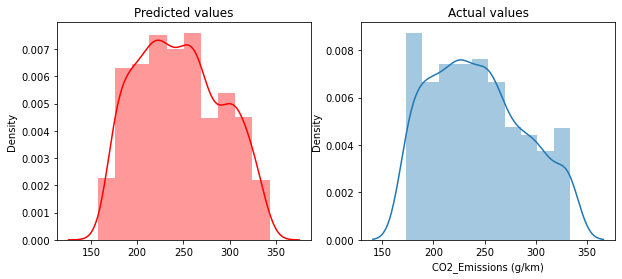

In [91]:
## Checking Distribustion of  data between predicted and Actual data.
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(LRSypred, bins = 10, color = 'red')
plt.title('Predicted values')
plt.subplot(1,2,2)
sns.distplot(ytest, bins = 10)
plt.title('Actual values')

## 4.Polynomial Regression
In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x). Although polynomial regression fits a nonlinear model to the data, as a statistical estimation problem it is linear, in the sense that the regression function E(y | x) is linear in the unknown parameters that are estimated from the data. For this reason, polynomial regression is considered to be a special case of multiple linear regression

For more information - https://en.wikipedia.org/wiki/Polynomial_regression

In [92]:
#### x contain alll independent variable columns and y contain dependent variable column.

x=df3.drop(columns=['CO2_Emissions (g/km)','Make','Model'])
y=df3["CO2_Emissions (g/km)"]

##### Splitting data into train and test

In [93]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

##### Model Training (Degree = 2)

In [94]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)
pf_xtrain=pf.fit_transform(xtrain)
pf_xtest=pf.fit_transform(xtest)
PRmodel=LinearRegression()
PRmodel.fit(pf_xtrain,ytrain)

LinearRegression()

In [95]:
PRmodel.coef_

array([ 3.69021602e-11,  5.82234316e+00,  3.97799643e+01, -3.76768641e+00,
        3.99705225e-02, -1.69208751e+02,  1.53207600e+01, -5.59493145e+01,
        1.63384391e+02,  4.33738431e+01, -3.59554839e-02, -1.09942959e-01,
       -6.90976867e-03, -2.99676643e-03, -4.39656675e-01, -1.05647635e+00,
       -1.34801461e+00,  2.19645427e+00, -7.40218416e-02,  3.33774277e+00,
       -8.58878475e+00, -1.84297980e-01, -4.97630718e+00, -1.11658856e+00,
       -5.12802537e+00,  7.26297961e+00, -3.44242063e-01,  3.69730653e+00,
        1.55229647e-01, -3.61411290e+00, -3.99394290e+00, -1.23318304e+00,
        4.99348909e+00,  2.48696679e-01, -6.07949925e-03,  1.01997527e-01,
        1.23539076e-01,  2.30602535e-02, -1.90376290e-01, -7.34578475e-03,
        1.87016403e-01,  9.88795651e+00,  2.77666531e+00, -7.83175992e-01,
        2.48816486e+00,  5.15951365e+00,  1.01303165e+01, -2.04681495e+01,
       -5.17782050e-01,  6.61056110e+00, -1.74075513e+01,  9.59395511e-01,
        1.28368647e+01, -

In [96]:
PRmodel.intercept_

-967.0748550820006

##### Model Testing

In [97]:
PRypred=PRmodel.predict(pf_xtest)

##### Model Evaluation

In [98]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(ytest,PRypred).round(3)
mae=mean_absolute_error(ytest,PRypred).round(3)
rmse=np.sqrt(mse).round(3)
r2_score=r2_score(ytest,PRypred).round(3)
print("Mean Squared Error =", mse)
print("Mean Absolute Error =", mae)
print("Root Mean Squared Error =", rmse)
print("R2_Score Value =", r2_score)

Mean Squared Error = 34.209
Mean Absolute Error = 3.666
Root Mean Squared Error = 5.849
R2_Score Value = 0.984


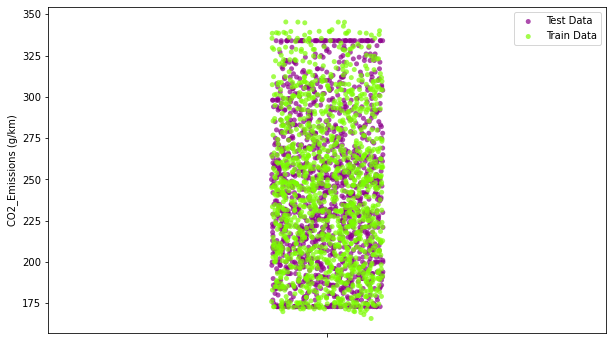

In [99]:
plt.figure(figsize=(10,6))
sns.stripplot(y = ytest, color = 'darkmagenta', alpha = 0.7, label = 'Test Data')
sns.stripplot(y = PRypred, color = 'lawngreen', alpha = 0.7, label = 'Train Data')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Actual values')

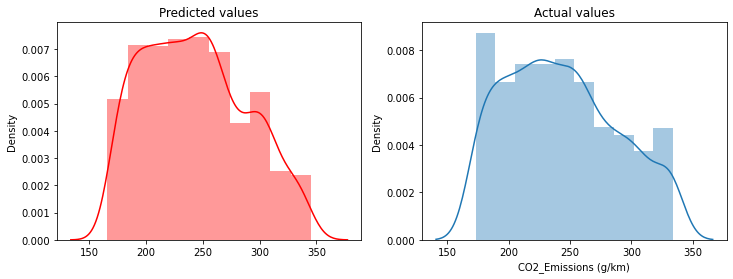

In [100]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(PRypred, bins = 10, color = 'red')
plt.title('Predicted values')
plt.subplot(1,2,2)
sns.distplot(ytest, bins = 10)
plt.title('Actual values')

### Checking Model by using Standard Scaler

In [101]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)
pf_xtrain=pf.fit_transform(sc_xtrain)
pf_xtest=pf.fit_transform(sc_xtest)
PRmodel_sc=LinearRegression()
PRmodel_sc.fit(pf_xtrain,ytrain)

LinearRegression()

In [102]:
PRSypred=PRmodel_sc.predict(pf_xtest)

In [103]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(ytest,PRSypred).round(3)
mae=mean_absolute_error(ytest,PRSypred).round(3)
rmse=np.sqrt(mse).round(3)
r2_score=r2_score(ytest,PRSypred).round(3)
print("Mean Squared Error =", mse)
print("Mean Absolute Error =", mae)
print("Root Mean Squared Error =", rmse)
print("R2_Score Value =", r2_score)

Mean Squared Error = 39.798
Mean Absolute Error = 4.345
Root Mean Squared Error = 6.309
R2_Score Value = 0.981


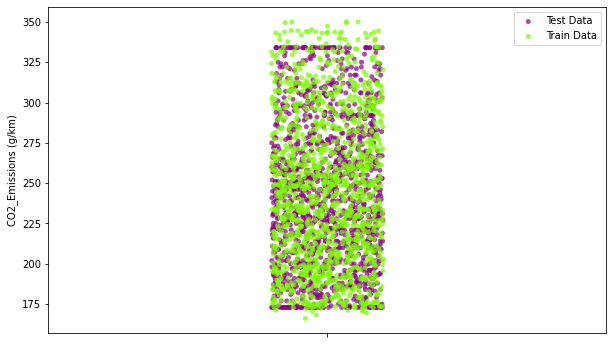

In [104]:
plt.figure(figsize=(10,6))
sns.stripplot(y = ytest, color = 'darkmagenta', alpha = 0.7, label = 'Test Data')
sns.stripplot(y = PRSypred, color = 'lawngreen', alpha = 0.7, label = 'Train Data')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Actual values')

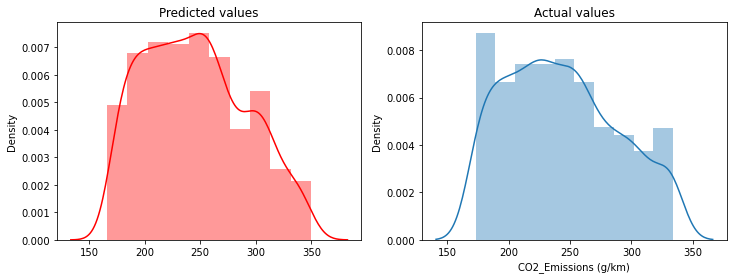

In [105]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(PRSypred, bins = 10, color = 'red')
plt.title('Predicted values')
plt.subplot(1,2,2)
sns.distplot(ytest, bins = 10)
plt.title('Actual values')

##### Model Training (Degree = 3)

In [106]:
pf=PolynomialFeatures(degree=3)
pf_xtrain=pf.fit_transform(xtrain)
pf_xtest=pf.fit_transform(xtest)
PRmodel=LinearRegression()
PRmodel.fit(pf_xtrain,ytrain)

LinearRegression()

In [107]:
ypred=PRmodel.predict(pf_xtest)

In [108]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(ytest,ypred).round(3)
mae=mean_absolute_error(ytest,ypred).round(3)
rmse=np.sqrt(mse).round(3)
r2_score=r2_score(ytest,ypred).round(3)
print("Mean Squared Error =", mse)
print("Mean Absolute Error =", mae)
print("Root Mean Squared Error =", rmse)
print("R2_Score Value =", r2_score)

Mean Squared Error = 14.315
Mean Absolute Error = 2.557
Root Mean Squared Error = 3.784
R2_Score Value = 0.993


##### Model Training (Degree = 4)

In [109]:
pf=PolynomialFeatures(degree=4)
pf_xtrain=pf.fit_transform(xtrain)
pf_xtest=pf.fit_transform(xtest)
PRmodel=LinearRegression()
PRmodel.fit(pf_xtrain,ytrain)

LinearRegression()

In [110]:
ypred=PRmodel.predict(pf_xtest)

In [111]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(ytest,ypred).round(3)
mae=mean_absolute_error(ytest,ypred).round(3)
rmse=np.sqrt(mse).round(3)
r2_score=r2_score(ytest,ypred).round(3)
print("Mean Squared Error =", mse)
print("Mean Absolute Error =", mae)
print("Root Mean Squared Error =", rmse)
print("R2_Score Value =", r2_score)

Mean Squared Error = 9.203
Mean Absolute Error = 2.08
Root Mean Squared Error = 3.034
R2_Score Value = 0.996


##### From the above different different results of degree 2 to 4 we can conclude that if we increase the degree we get good results.and here model with degree 4 gives the best result as compare to model with degree 2 & 3.

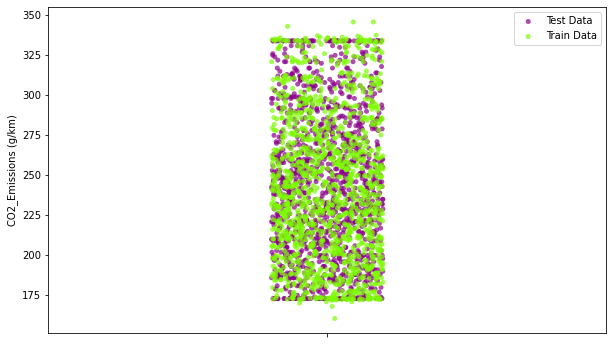

In [112]:
plt.figure(figsize=(10,6))
sns.stripplot(y = ytest, color = 'darkmagenta', alpha = 0.7, label = 'Test Data')
sns.stripplot(y = ypred, color = 'lawngreen', alpha = 0.7, label = 'Train Data')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Actual values')

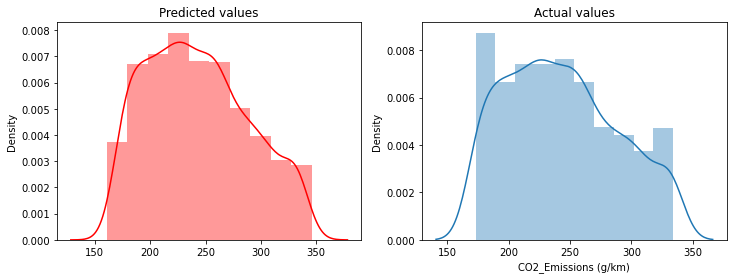

In [113]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(ypred, bins = 10, color = 'red')
plt.title('Predicted values')
plt.subplot(1,2,2)
sns.distplot(ytest, bins = 10)
plt.title('Actual values')

## 5.Ridge Regression
Tikhonov regularization, named for Andrey Tikhonov, is a method of regularization of ill-posed problems. Ridge regression is a special case of Tikhonov regularization in which all parameters are regularized equally. Ridge regression is particularly useful to mitigate the problem of multicollinearity in linear regression, which commonly occurs in models with large numbers of parameters. In general, the method provides improved efficiency in parameter estimation problems in exchange for a tolerable amount of bias (see bias–variance tradeoff).

For more information - https://en.wikipedia.org/wiki/Ridge_regression

In [114]:
#### x contain alll independent variable columns and y contain dependent variable column.

x=df3.drop(columns=['CO2_Emissions (g/km)','Make','Model'])
y=df3["CO2_Emissions (g/km)"]

###### Importing Ridge and GridSearch CV

In [115]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

##### Splitting data in train and test

In [116]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

##### To check best value of alpha and fit the data using cross validation

In [117]:
#model
model=Ridge()

#Parameters
alpha=[0.0001,0.001,0.01,0.1,1,10,100]

#grid
grid=dict(alpha=alpha)

#GridSearchCV
gridcv=GridSearchCV(estimator=model,param_grid=grid,cv=5,scoring='accuracy')

#result
result=gridcv.fit(xtrain,ytrain)
print(result.best_params_)

{'alpha': 0.0001}


Best Alpha is 0.0001

###### Model Training

In [118]:
ridge=Ridge(alpha=0.0001)
ridge.fit(xtrain,ytrain)

Ridge(alpha=0.0001)

###### Model Testing

In [119]:
Rypred=ridge.predict(xtest)

###### Model Evaluation

In [120]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(ytest,Rypred).round(3)
mae=mean_absolute_error(ytest,Rypred).round(3)
rmse=np.sqrt(mse).round(3)
r2_score=r2_score(ytest,Rypred).round(3)
print("Mean Squared Error =", mse)
print("Mean Absolute Error =", mae)
print("Root Mean Squared Error =", rmse)
print("R2_Score Value =", r2_score)

Mean Squared Error = 132.352
Mean Absolute Error = 7.022
Root Mean Squared Error = 11.504
R2_Score Value = 0.936


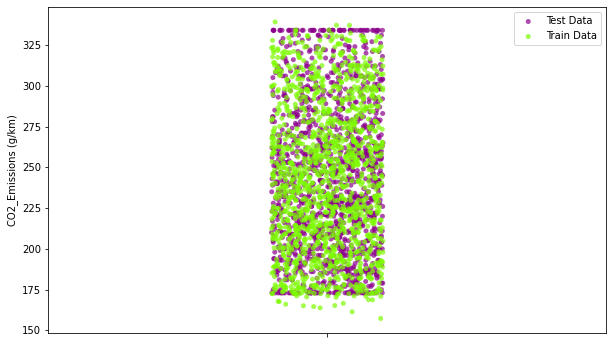

In [121]:
plt.figure(figsize=(10,6))
sns.stripplot(y = ytest, color = 'darkmagenta', alpha = 0.7, label = 'Test Data')
sns.stripplot(y = Rypred, color = 'lawngreen', alpha = 0.7, label = 'Train Data')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Actual values')

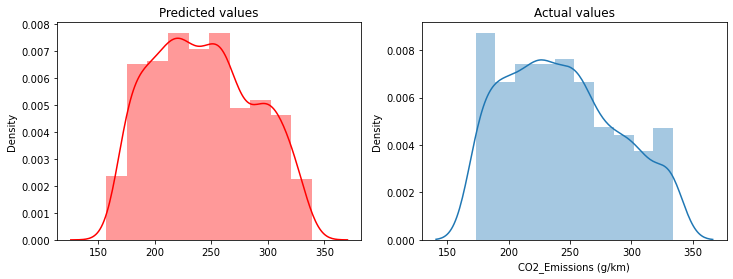

In [122]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(Rypred, bins = 10, color = 'red')
plt.title('Predicted values')
plt.subplot(1,2,2)
sns.distplot(ytest, bins = 10)
plt.title('Actual values')

### Checking model by using standard scaler

In [123]:
ridge_sc=Ridge(alpha=0.0001)
ridge_sc.fit(sc_xtrain,ytrain)

Ridge(alpha=0.0001)

In [124]:
RSypred=ridge_sc.predict(sc_xtest)

In [125]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(ytest,RSypred).round(3)
mae=mean_absolute_error(ytest,RSypred).round(3)
rmse=np.sqrt(mse).round(3)
r2_score=r2_score(ytest,RSypred).round(3)
print("Mean Squared Error =", mse)
print("Mean Absolute Error =", mae)
print("Root Mean Squared Error =", rmse)
print("R2_Score Value =", r2_score)

Mean Squared Error = 139.295
Mean Absolute Error = 7.168
Root Mean Squared Error = 11.802
R2_Score Value = 0.933


##### For alpha = 0.0001 we get the r2 score 0.93 for ridge model.

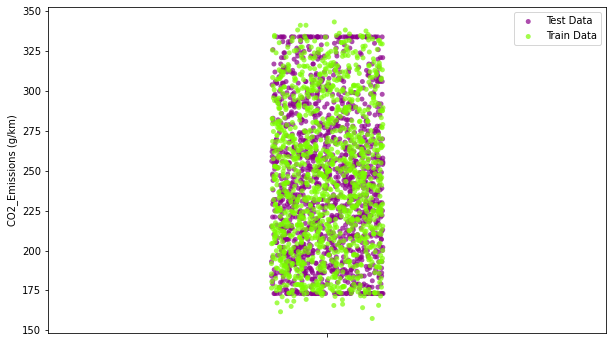

In [126]:
plt.figure(figsize=(10,6))
sns.stripplot(y = ytest, color = 'darkmagenta', alpha = 0.7, label = 'Test Data')
sns.stripplot(y = RSypred, color = 'lawngreen', alpha = 0.7, label = 'Train Data')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Actual values')

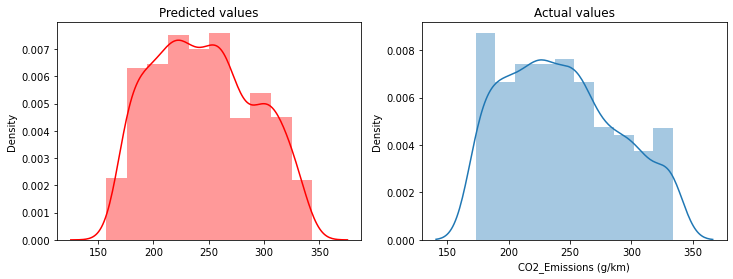

In [127]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(RSypred, bins = 10, color = 'red')
plt.title('Predicted values')
plt.subplot(1,2,2)
sns.distplot(ytest, bins = 10)
plt.title('Actual values')

## 6.Lasso Regression
In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model. It was originally introduced in geophysics, and later by Robert Tibshirani, who coined the term.

For more information - https://en.wikipedia.org/wiki/Lasso_(statistics)

In [128]:
#### x contain alll independent variable columns and y contain dependent variable column.

x=df3.drop(columns=['CO2_Emissions (g/km)','Make','Model'])
y=df3["CO2_Emissions (g/km)"]

##### Importing Lasso and GridSearchCV

In [129]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

##### Splitting data into Train and Test

In [130]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

##### To check best value of alpha and fit the data using cross validation

In [131]:
#model
model=Lasso()

#parameters
alpha=[0.001,0.01,0.1,1,10,15,20,100]

#grid
grid=dict(alpha=alpha)

#GridSearchCV
gridcv=GridSearchCV(estimator=model,param_grid=grid,cv=5)

#result
result=gridcv.fit(xtrain,ytrain)
print(result.best_params_)

{'alpha': 0.001}


 Best alpha is 0.001

###### Model Training

In [132]:
lasso=Lasso(alpha=0.001)
lasso.fit(xtrain,ytrain)

Lasso(alpha=0.001)

###### Model Testing

In [133]:
Lypred=lasso.predict(xtest)

###### Model Evaluation

In [134]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(ytest,Lypred).round(3)
mae=mean_absolute_error(ytest,Lypred).round(3)
rmse=np.sqrt(mse).round(3)
r2_score=r2_score(ytest,Lypred).round(3)
print("Mean Squared Error =", mse)
print("Mean Absolute Error =", mae)
print("Root Mean Squared Error =", rmse)
print("R2_Score Value =", r2_score)

Mean Squared Error = 133.57
Mean Absolute Error = 6.966
Root Mean Squared Error = 11.557
R2_Score Value = 0.936


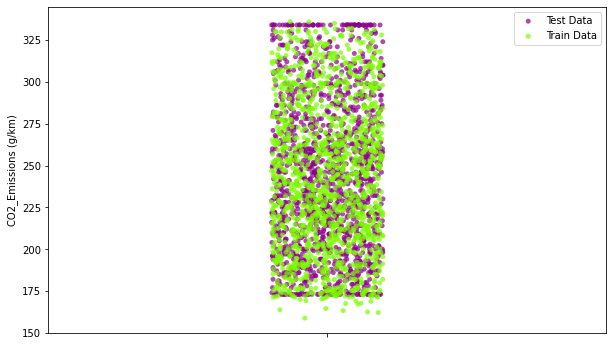

In [135]:
plt.figure(figsize=(10,6))
sns.stripplot(y = ytest, color = 'darkmagenta', alpha = 0.7, label = 'Test Data')
sns.stripplot(y = Lypred, color = 'lawngreen', alpha = 0.7, label = 'Train Data')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Actual values')

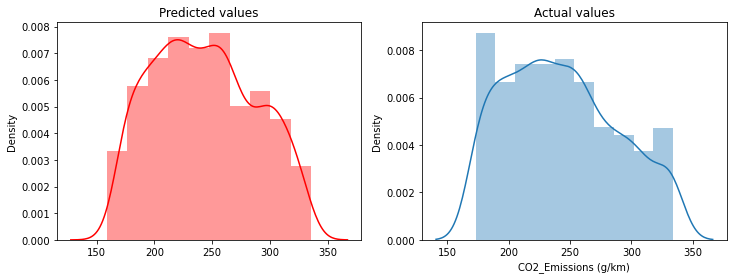

In [136]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(Lypred, bins = 10, color = 'red')
plt.title('Predicted values')
plt.subplot(1,2,2)
sns.distplot(ytest, bins = 10)
plt.title('Actual values')

### Checking model by using standard Scaler

In [137]:
lasso_sc=Lasso(alpha=0.001)
lasso_sc.fit(sc_xtrain,ytrain)

Lasso(alpha=0.001)

In [138]:
LSypred=lasso_sc.predict(sc_xtest)

In [139]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(ytest,LSypred).round(3)
mae=mean_absolute_error(ytest,LSypred).round(3)
rmse=np.sqrt(mse).round(3)
r2_score=r2_score(ytest,LSypred).round(3)
print("Mean Squared Error =", mse)
print("Mean Absolute Error =", mae)
print("Root Mean Squared Error =", rmse)
print("R2_Score Value =", r2_score)

Mean Squared Error = 140.474
Mean Absolute Error = 7.089
Root Mean Squared Error = 11.852
R2_Score Value = 0.932


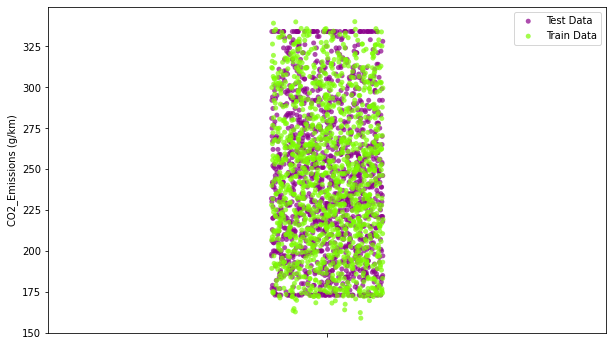

In [140]:
plt.figure(figsize=(10,6))
sns.stripplot(y = ytest, color = 'darkmagenta', alpha = 0.7, label = 'Test Data')
sns.stripplot(y = LSypred, color = 'lawngreen', alpha = 0.7, label = 'Train Data')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Actual values')

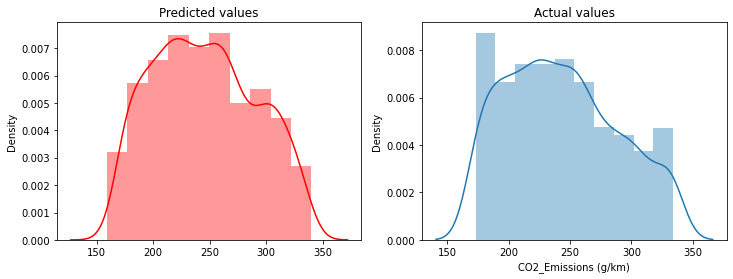

In [141]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(LSypred, bins = 10, color = 'red')
plt.title('Predicted values')
plt.subplot(1,2,2)
sns.distplot(ytest, bins = 10)
plt.title('Actual values')

##### Checking Training and Testing Score for linear Data

In [142]:
print("Linear Regression on training data:",LRmodel.score(xtrain,ytrain).round(3))
print("Linear Regression on testing data:",LRmodel.score(xtest,ytest).round(3))
print("Polynomial Regression on training data:",PRmodel.score(pf_xtrain,ytrain).round(3))
print("Polynomial Regression on testing data:",PRmodel.score(pf_xtest,ytest).round(3))
print("Ridge Regression on training data:",ridge.score(xtrain,ytrain).round(3))
print("Ridge Regression on testing data:",ridge.score(xtest,ytest).round(3))
print("Lasso Regression on training data:",lasso.score(xtrain,ytrain).round(3))
print("Lasso Regression on testing data:",lasso.score(xtest,ytest).round(3))

Linear Regression on training data: 0.932
Linear Regression on testing data: 0.936
Polynomial Regression on training data: 0.998
Polynomial Regression on testing data: 0.996
Ridge Regression on training data: 0.932
Ridge Regression on testing data: 0.936
Lasso Regression on training data: 0.931
Lasso Regression on testing data: 0.936


Model is Perfectly fit.

## 7.ElasticNet 
Elastic net is a popular type of regularized linear regression that combines two popular penalties, specifically the L1 and L2 penalty functions. The coefficients of the model are found via an optimization process that seeks to minimize the sum squared error between the predictions (yprid) and the expected target values (y). A problem with linear regression is that estimated coefficients of the model can become large, making the model sensitive to inputs and possibly unstable. This is particularly true for problems with few observations (samples) or more samples (n) than input predictors (p) or variables (so-called p >> n problems).

One approach to addressing the stability of regression models is to change the loss function to include additional costs for a model that has large coefficients. Linear regression models that use these modified loss functions during training are referred to collectively as penalized linear regression.

For more information - https://en.wikipedia.org/wiki/Elastic_net_regularization

In [143]:
#### x contain alll independent variable columns and y contain dependent variable column.

x=df3.drop(columns=['CO2_Emissions (g/km)','Make','Model'])
y=df3["CO2_Emissions (g/km)"]

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [145]:
xtrain,xtest,ytain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [146]:
alpha=[0.0001,0.001,0.01,0.1,0.3,0.5,1,10,15,20,100]

In [147]:
scores={}

In [148]:
def get_best_alpha(alpha):
    for i in alpha:
        Emodel=ElasticNet(alpha=i)
        Emodel.fit(xtrain,ytrain)
        Eypred=Emodel.predict(xtest)
        mse=mean_squared_error(ytest,Eypred).round(3)
        rmse=np.sqrt(mse).round(3)
        mae=mean_absolute_error(ytest,Eypred).round(3)
        scores[i]=Emodel.score(xtest,ytest).round(3)
        print(" For Alpha = {} | R-square :{} MSE :{} RMSE :{} MAE:{} ".format(i,Emodel.score(xtest,ytest).round(3),mse,rmse,mae))
    return max(scores, key= lambda x: scores[x])

In [149]:
print("Best Alpha is :",get_best_alpha(alpha))

 For Alpha = 0.0001 | R-square :0.936 MSE :133.566 RMSE :11.557 MAE:6.967 
 For Alpha = 0.001 | R-square :0.936 MSE :133.869 RMSE :11.57 MAE:6.968 
 For Alpha = 0.01 | R-square :0.934 MSE :136.507 RMSE :11.684 MAE:7.004 
 For Alpha = 0.1 | R-square :0.932 MSE :141.726 RMSE :11.905 MAE:7.067 
 For Alpha = 0.3 | R-square :0.93 MSE :144.922 RMSE :12.038 MAE:7.082 
 For Alpha = 0.5 | R-square :0.929 MSE :147.758 RMSE :12.156 MAE:7.103 
 For Alpha = 1 | R-square :0.926 MSE :153.737 RMSE :12.399 MAE:7.204 
 For Alpha = 10 | R-square :0.898 MSE :212.27 RMSE :14.569 MAE:9.934 
 For Alpha = 15 | R-square :0.881 MSE :246.633 RMSE :15.705 MAE:11.554 
 For Alpha = 20 | R-square :0.862 MSE :286.466 RMSE :16.925 MAE:13.033 
 For Alpha = 100 | R-square :0.506 MSE :1028.038 RMSE :32.063 MAE:26.897 
Best Alpha is : 0.0001


For Alpha = 0.0001  
        
    R-square :0.925 
    MSE :156.126 
    RMSE :12.495 
    MAE:7.636 

### Checking model by using Standard Scaler

In [150]:
def get_best_alpha(alpha):
    for i in alpha:
        Emodel_sc=ElasticNet(alpha=i)
        Emodel_sc.fit(sc_xtrain,ytrain)
        ESypred=Emodel_sc.predict(sc_xtest)
        mse=mean_squared_error(ytest,ESypred).round(3)
        rmse=np.sqrt(mse).round(3)
        mae=mean_absolute_error(ytest,ESypred).round(3)
        scores[i]=Emodel_sc.score(sc_xtest,ytest).round(3)
        print(" For Alpha = {} | R-square :{} MSE :{} RMSE :{} MAE:{} ".format(i,Emodel_sc.score(sc_xtest,ytest).round(3),mse,rmse,mae))
    return max(scores, key= lambda x: scores[x])

In [151]:
print("Best Alpha is :",get_best_alpha(alpha))

 For Alpha = 0.0001 | R-square :0.932 MSE :140.548 RMSE :11.855 MAE:7.09 
 For Alpha = 0.001 | R-square :0.932 MSE :141.879 RMSE :11.911 MAE:7.097 
 For Alpha = 0.01 | R-square :0.93 MSE :146.522 RMSE :12.105 MAE:7.158 
 For Alpha = 0.1 | R-square :0.928 MSE :149.341 RMSE :12.221 MAE:7.247 
 For Alpha = 0.3 | R-square :0.927 MSE :152.09 RMSE :12.332 MAE:7.576 
 For Alpha = 0.5 | R-square :0.925 MSE :155.597 RMSE :12.474 MAE:7.932 
 For Alpha = 1 | R-square :0.919 MSE :168.84 RMSE :12.994 MAE:8.913 
 For Alpha = 10 | R-square :0.658 MSE :711.722 RMSE :26.678 MAE:22.215 
 For Alpha = 15 | R-square :0.531 MSE :975.975 RMSE :31.241 MAE:26.097 
 For Alpha = 20 | R-square :0.431 MSE :1184.388 RMSE :34.415 MAE:28.815 
 For Alpha = 100 | R-square :-0.003 MSE :2086.012 RMSE :45.673 MAE:38.408 
Best Alpha is : 0.0001


For Alpha = 0.0001 
      
     R-square :0.932 
     MSE :140.548 
     RMSE :11.855 
     MAE:7.09

## ElasticNet CV
Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally. Here is a flowchart of typical cross validation workflow in model training.

In [152]:
#### x contain alll independent variable columns and y contain dependent variable column.

x=df3.drop(columns=['CO2_Emissions (g/km)','Make','Model'])
y=df3["CO2_Emissions (g/km)"]

In [153]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split

In [154]:
xtrain,xtest,ytain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [155]:
alpha=[0.0001,0.001,0.01,0.1,0.3,0.5,1,10,15,20,100]

In [156]:
## Model Training
ECVmodel= ElasticNetCV(alphas=alpha,cv=5)
ECVmodel.fit(xtrain,ytrain)

ElasticNetCV(alphas=[0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 1, 10, 15, 20, 100],
             cv=5)

In [157]:
## Best Alpha
ECVmodel.alpha_

0.0001

In [158]:
## Model Testing
CVypred=ECVmodel.predict(xtest)
CVypred.shape

(1366,)

In [159]:
## Model Evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(ytest,CVypred).round(3)
mae=mean_absolute_error(ytest,CVypred).round(3)
rmse=np.sqrt(mse).round(3)
score=ECVmodel.score(xtest,ytest).round(3)
print("Mean Squared Error =", mse)
print("Mean Absolute Error =", mae)
print("Root Mean Squared Error =", rmse)
print("R2_Score Value =", score)

Mean Squared Error = 133.566
Mean Absolute Error = 6.967
Root Mean Squared Error = 11.557
R2_Score Value = 0.936


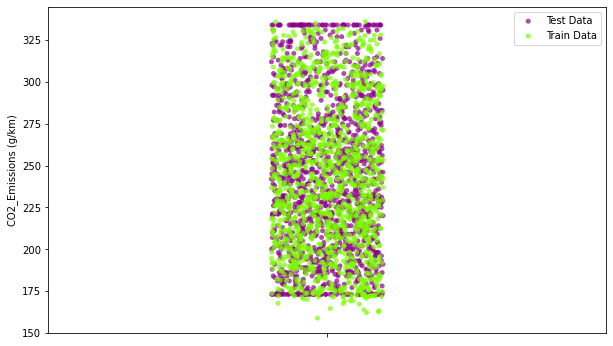

In [160]:
plt.figure(figsize=(10,6))
sns.stripplot(y = ytest, color = 'darkmagenta', alpha = 0.7, label = 'Test Data')
sns.stripplot(y = CVypred, color = 'lawngreen', alpha = 0.7, label = 'Train Data')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Actual values')

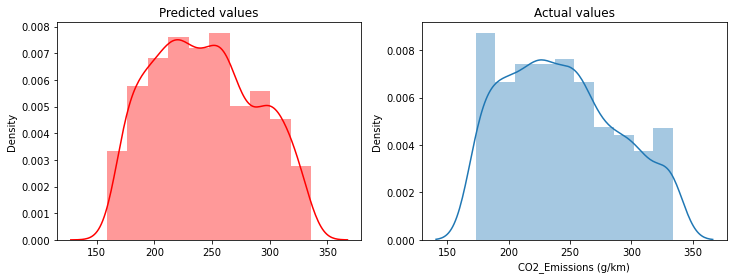

In [161]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(CVypred, bins = 10, color = 'red')
plt.title('Predicted values')
plt.subplot(1,2,2)
sns.distplot(ytest, bins = 10)
plt.title('Actual values')

### Checking model by using Standard Scaler

In [162]:
ECVmodel_sc= ElasticNetCV(alphas=alpha,cv=5)
ECVmodel_sc.fit(sc_xtrain,ytrain)

ElasticNetCV(alphas=[0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 1, 10, 15, 20, 100],
             cv=5)

In [163]:
## Best Alpha
ECVmodel_sc.alpha_

0.0001

In [164]:
CVSypred=ECVmodel_sc.predict(sc_xtest)
CVSypred.shape

(1366,)

In [165]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(ytest,CVSypred).round(3)
mae=mean_absolute_error(ytest,CVSypred).round(3)
rmse=np.sqrt(mse).round(3)
score=ECVmodel_sc.score(sc_xtest,ytest).round(3)
print("Mean Squared Error =", mse)
print("Mean Absolute Error =", mae)
print("Root Mean Squared Error =", rmse)
print("R2_Score Value =", score)

Mean Squared Error = 140.548
Mean Absolute Error = 7.09
Root Mean Squared Error = 11.855
R2_Score Value = 0.932


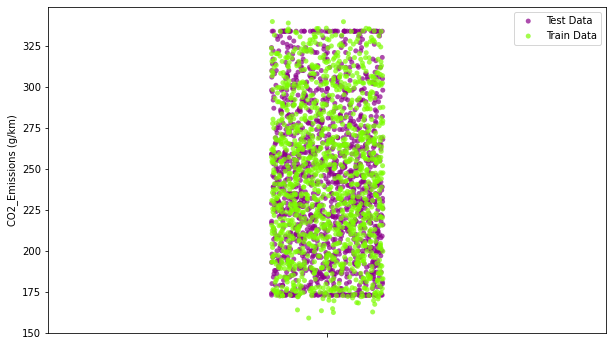

In [166]:
plt.figure(figsize=(10,6))
sns.stripplot(y = ytest, color = 'darkmagenta', alpha = 0.7, label = 'Test Data')
sns.stripplot(y = CVSypred, color = 'lawngreen', alpha = 0.7, label = 'Train Data')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Actual values')

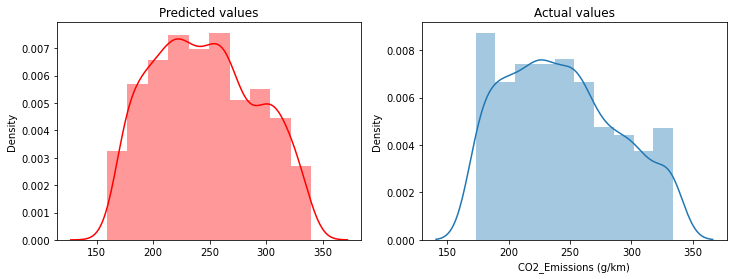

In [167]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(CVSypred, bins = 10, color = 'red')
plt.title('Predicted values')
plt.subplot(1,2,2)
sns.distplot(ytest, bins = 10)
plt.title('Actual values')

# 8.Final Evaluation

In [168]:
## Making lists of model names and there respected results.

Model=["Initial","Linear","Linear Multicolinearity","Linear sc","Polynomial Degree 2","Polynomial D=2 sc","Polynomial Degree 3",
       "Polynomial Degree 4","Ridge","Ridge sc","Lasso","Lasso sc","ElasticNet","ElasticNet sc","ElasticNetCV","ElasticNetCV sc"]

mse=[146.607,132.352,156.125,139.295,34.209,39.798,14.315,9.209,132.352,139.295,133.57,140.474,156.126,140.548,133.566,140.548]

mae=[7.437,7.022,7.636,7.168,3.666,4.345,2.557,2.08,7.022,7.168,6.966,7.089,7.636,7.09,6.967,7.09]

rmse=[12.108,11.504,12.495,11.802,5.849,6.309,3.784,3.034,11.504,11.802,11.557,11.852,12.495,11.855,11.557,11.855]

r2_score=[0.933,0.936,0.925,0.933,0.984,0.981,0.993,0.996,0.936,0.933,0.936,0.932,0.925,0.932,0.936,0.932]


In [169]:
## making dataframe of the results by using dictionary.

dict={'Model_Name':Model,'Mean_squared_error':mse,'Mean_absolute_error':mae,'Root_mean_squared_error':rmse,'r2_Score':r2_score}
result=pd.DataFrame(dict)
result

Model_Name  Mean_squared_error  Mean_absolute_error  \
0                   Initial             146.607                7.437   
1                    Linear             132.352                7.022   
2   Linear Multicolinearity             156.125                7.636   
3                 Linear sc             139.295                7.168   
4       Polynomial Degree 2              34.209                3.666   
5         Polynomial D=2 sc              39.798                4.345   
6       Polynomial Degree 3              14.315                2.557   
7       Polynomial Degree 4               9.209                2.080   
8                     Ridge             132.352                7.022   
9                  Ridge sc             139.295                7.168   
10                    Lasso             133.570                6.966   
11                 Lasso sc             140.474                7.089   
12               ElasticNet             156.126                7.636   
13            ElasticNet sc             140.548                7.090   
14             ElasticNetCV             133.566                6.967   
15          ElasticNetCV sc             140.548                7.090   

    Root_mean_squared_error  r2_Score  
0                    12.108     0.933  
1                    11.504     0.936  
2                    12.495     0.925  
3                    11.802     0.933  
4                     5.849     0.984  
5                     6.309     0.981  
6                     3.784     0.993  
7                     3.034     0.996  
8                    11.504     0.936  
9                    11.802     0.933  
10                   11.557     0.936  
11                   11.852     0.932  
12                   12.495     0.925  
13                   11.855     0.932  
14                   11.557     0.936  
15                   11.855     0.932

sc= with standard Scaler data

# 9.Performance of model by Visualization

Text(0.5, 1.0, 'Regression Models vs r2 score')

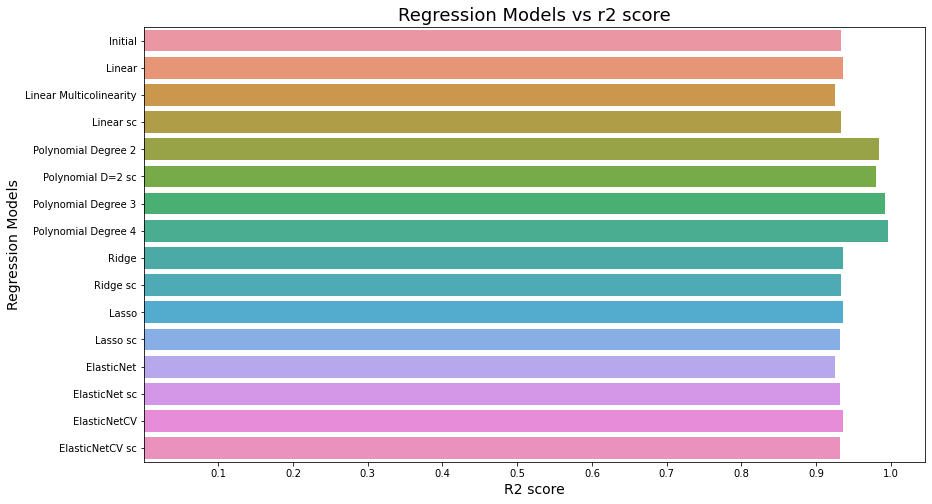

In [170]:
## Result that is r2 score Visualization.

x=result["Model_Name"]
y=result["r2_Score"]
plt.figure(figsize=(14,8))
sns.barplot(y,x,orient='h')
plt.xlabel('R2 score',fontsize=14)
plt.ylabel('Regression Models',fontsize=14)
plt.xticks(ticks=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.title('Regression Models vs r2 score',fontsize=18)


As we see in above barplot we can clearly say that for our dataset polynomial regression models specially polynomial with degree 3 and 4 gives best performance as its r2 score is more than others models which is 0.993 ,0.996 respectively and value of MAE,MS,RMSE is less.

More the r2 score close to 1 that model is best for given dataset.

All other models are also giving good result.

# 10.Conclusion

From all the above Model operations we can conclude the following points.
    
    1.Among all above model Polynomial Regression model gives best results for our dataset.
    2.Polynomial Model with degree 3 gives r2 score= 0.993, MAE=2.557, MSE=14.315, RMSE=3.784.
    3.Polynomial Model with degree 4 gives r2 score= 0.996, MAE=2.08, MSE=9.203, RMSE=3.034.
    3.Initial r2 score was 0.933 and with the help of polynomial models it is increases by 5 to 6 digits which is in the 
     range of 0.98- 1 as you see below.
 
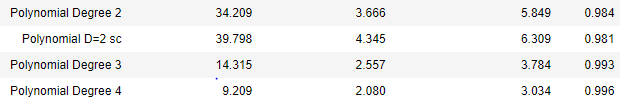
    
    5.All others model like Linear,Ridge,Lasso are also not that much bad for our dataset but not as good as polynomial 
      models.
    6.There is no underfitting and overfitting in our data.
    7.Luckly we have not found any missing values in our dataset
    8.We learned so many new things through this project.

# Thank you and give suggestions for improvement.